## Segmentation & Feature extraction on labeled data

This file represents the preprocessing pipeline for feature extraction with tsfresh library from labeled data

This should be completed with the clustering method from the /clustering pipeline

In [1]:
# Desired sample rate
resample_rate=4

window_size = 24

#tsfresh
max_window=20

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import ruptures as rpt 
import matplotlib.pyplot as plt
import matplotlib.legend_handler as handler

from pandas.plotting import autocorrelation_plot

from tsfresh import extract_features, select_features, feature_extraction,extract_relevant_features
from tsfresh.utilities.dataframe_functions import roll_time_series, make_forecasting_frame
from tsfresh.utilities.dataframe_functions import impute

import os

In [3]:
datapath=os.path.join('../data/labeled')

file='059-COMBINED-2022-11-9-10-20-34-1667996115-v1.4.3+lucina-buzz.csv'
file='LC01-PVH-COMBINED-201-1-1-4-12-9-1668712469-v1.4.3+lucina-buzz-to-nobuzz.csv'
file='NVL1-654-COMBINED-2022-12-9-16-10-6-1670608300-v1.4.2+lucina-buzz.csv'
df=pd.read_csv(os.path.join(datapath,file))
 
sample_rate=25

# create an array of index values with a fixed step
time_index = np.linspace(0, (len(df)-1)/sample_rate, num=len(df))

# use this array as the index
df.index = time_index

# Resample the dataframe at (resample_rate) Hz
df_resampled = df.groupby(np.arange(len(df))//(sample_rate/resample_rate)).mean(numeric_only=True)

df_resampled['label'] = df.groupby(np.floor(np.arange(len(df))/(sample_rate/resample_rate))).last()['label']
df_resampled['label2'] = df.groupby(np.floor(np.arange(len(df))/(sample_rate/resample_rate))).last()['label2']

print (len(df))
df=df_resampled
print (len(df))  

9400
1504


In [4]:
# Make an array with x,y,z acc and gyro and alpha_r and beta_r to use in ruptures

ts_start= int(125/resample_rate)
ts_end  = len(df)

acc_x_r_c=np.array(df['acc_x_r'][ts_start:ts_end])
acc_y_r_c=np.array(df['acc_y_r'][ts_start:ts_end])
acc_z_r_c=np.array(df['acc_z_r'][ts_start:ts_end])

acc_x_n_c=np.array(df['acc_x_n'][ts_start:ts_end])
acc_y_n_c=np.array(df['acc_y_n'][ts_start:ts_end])
acc_z_n_c=np.array(df['acc_z_n'][ts_start:ts_end])

gyr_x_n_c=np.array(df['gyr_x_n'][ts_start:ts_end])
gyr_y_n_c=np.array(df['gyr_y_n'][ts_start:ts_end])
gyr_z_n_c=np.array(df['gyr_z_n'][ts_start:ts_end])

gyr_x_r_c=np.array(df['gyr_x_r'][ts_start:ts_end])
gyr_y_r_c=np.array(df['gyr_y_r'][ts_start:ts_end])
gyr_z_r_c=np.array(df['gyr_z_r'][ts_start:ts_end])

alpha_r_c = np.array(df['alpha_r'][ts_start:ts_end])
beta_r_c  = np.array(df['beta_r'][ts_start:ts_end])
 
label=np.array(df['label'][ts_start:ts_end])


# Smoothing (Moving average of 100)
window = np.ones(100) / 100
acc_x_r_c = np.convolve(acc_x_r_c, window, mode='valid')
acc_y_r_c = np.convolve(acc_y_r_c, window, mode='valid')
acc_z_r_c = np.convolve(acc_z_r_c, window, mode='valid')

acc_x_n_c = np.convolve(acc_x_n_c, window, mode='valid')
acc_y_n_c = np.convolve(acc_y_n_c, window, mode='valid')
acc_z_n_c = np.convolve(acc_z_n_c, window, mode='valid')

gyr_x_r_c = np.convolve(gyr_x_r_c, window, mode='valid')
gyr_y_r_c = np.convolve(gyr_y_r_c, window, mode='valid')
gyr_z_r_c = np.convolve(gyr_z_r_c, window, mode='valid')

gyr_x_n_c = np.convolve(gyr_x_n_c, window, mode='valid')
gyr_y_n_c = np.convolve(gyr_y_n_c, window, mode='valid')
gyr_z_n_c = np.convolve(gyr_z_n_c, window, mode='valid')

alpha_r_c = np.convolve(alpha_r_c, window, mode='valid')
beta_r_c = np.convolve(beta_r_c, window, mode='valid') 



# Normalise
alpha_r = (alpha_r_c - alpha_r_c.min()) * (2/(alpha_r_c.max() - alpha_r_c.min())) - 1
beta_r = (beta_r_c - beta_r_c.min()) * (2/(beta_r_c.max() - beta_r_c.min())) - 1
#alpha_r=alpha_r_c
#beta_r=beta_r_c
#alpha_min_beta=abs(alpha_r)-abs(beta_r)
alpha_min_beta=alpha_r-beta_r

acc_x_n = (acc_x_n_c - acc_x_n_c.min()) * (2/(acc_x_n_c.max() - acc_x_n_c.min())) - 1 
acc_y_n = (acc_y_n_c - acc_y_n_c.min()) * (2/(acc_y_n_c.max() - acc_y_n_c.min())) - 1
acc_z_n = (acc_z_n_c - acc_z_n_c.min()) * (2/(acc_z_n_c.max() - acc_z_n_c.min())) - 1

acc_x_r = (acc_x_r_c - acc_x_r_c.min()) * (2/(acc_x_r_c.max() - acc_x_r_c.min())) - 1 
acc_y_r = (acc_y_r_c - acc_y_r_c.min()) * (2/(acc_y_r_c.max() - acc_y_r_c.min())) - 1
acc_z_r = (acc_z_r_c - acc_z_r_c.min()) * (2/(acc_z_r_c.max() - acc_z_r_c.min())) - 1

gyr_x_n = (gyr_x_n_c - gyr_x_n_c.min()) * (2/(gyr_x_n_c.max() - gyr_x_n_c.min())) - 1 
gyr_y_n = (gyr_y_n_c - gyr_y_n_c.min()) * (2/(gyr_y_n_c.max() - gyr_y_n_c.min())) - 1
gyr_z_n = (gyr_z_n_c - gyr_z_n_c.min()) * (2/(gyr_z_n_c.max() - gyr_z_n_c.min())) - 1

gyr_x_r = (gyr_x_r_c - gyr_x_r_c.min()) * (2/(gyr_x_r_c.max() - gyr_x_r_c.min())) - 1 
gyr_y_r = (gyr_y_r_c - gyr_y_r_c.min()) * (2/(gyr_y_r_c.max() - gyr_y_r_c.min())) - 1
gyr_z_r = (gyr_z_r_c - gyr_z_r_c.min()) * (2/(gyr_z_r_c.max() - gyr_z_r_c.min())) - 1

In [5]:
 
def plot_segments(signal1,signal2,signal3,signal4,signal5,signal6,stacked_data,window_size,penalty,range_start,range_end):
    label_colors = {'kalibratie': 'black', 'staan': 'blue',   'armen_hoog':'green', 'wandelen':'cyan', 'buiging':'orange',
        'draaien':'red'}

    # Window-based approach 
    algo = rpt.Window(width=window_size, model='rbf').fit(stacked_data)
    results = algo.predict(pen=penalty) 

    # Radial basis function kernel
    #algo=rpt.Pelt(model='rbf').fit(stacked_data)
    #results=algo.predict(pen=penalty) 

    # Draw the gyroscope plot
    fig,ax=plt.subplots(figsize=(16, 4))
    plt.title(f'Segmentation / {stacked_data.shape[1]} signals')

    axb=ax.twinx()

    signal_list=[signal1,signal2,signal3,signal4,signal5,signal6]
    ax.plot(signal_list[0],color='tab:red',linewidth=.25 , label ='x' , alpha=1)
    ax.plot(signal_list[1],color='tab:orange',linewidth=.25 , label ='y' , alpha=1)
    ax.plot(signal_list[2],color='tab:cyan',linewidth=.25 , label ='z'  , alpha=1)
    ax.set_xlim(range_start,range_end)
    axb.plot(signal_list[3],color='tab:green',linewidth=1.6 , label ='alpha')
    axb.plot(signal_list[4],color='tab:blue',linewidth=1.6 , label ='beta')
    axb.plot(signal_list[5],color='tab:red',linewidth=1.6 , label ='a_min_b')
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1))
    axb.legend(loc='upper right', bbox_to_anchor=(1, 1))

    unique_labels = np.unique(df_resampled['label'].values)
    label_colors = {label:label_colors[label] for label in unique_labels if label in label_colors}

    for index, label in df['label'].items():
    
        if label in label_colors:
            color = label_colors[label]
            plt.axvline(x=index, color=color, label=label, alpha=0.05)
    

    # Draw the change points
    cnt=int(0)
    for r in results:
        ax.axvline(x=r,color="tab:red",linewidth=3,linestyle=':')
        cnt+=1


    # Result
    print (cnt,'points detected using window size= ',window_size,' and penalty=',penalty)
    


70 points detected using window size=  16  and penalty= 0.33
42 points detected using window size=  16  and penalty= 0.33


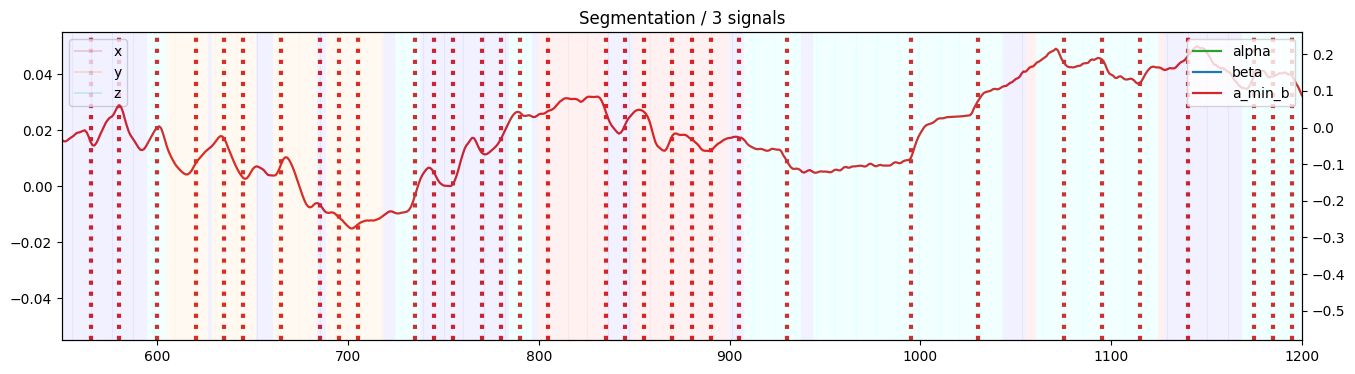

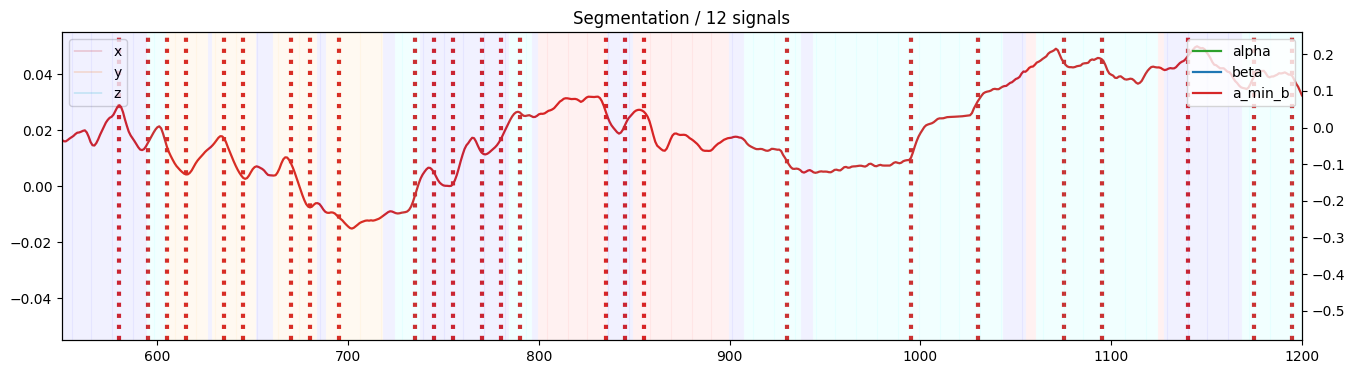

In [6]:

range_start=550
range_end=1200
stacked_data=np.vstack([alpha_r,beta_r]).T
stacked_data=np.vstack([acc_x_n,acc_y_n,acc_z_n,acc_x_r,acc_y_r,acc_z_r,gyr_x_n,gyr_y_n,gyr_z_n,gyr_x_r,gyr_y_r,gyr_z_r,alpha_r,beta_r]).T
a=np.vstack([acc_x_n,acc_y_n,acc_z_n]).T
a=np.vstack([acc_x_n,acc_y_n,acc_z_n]).T
stacked_data=np.vstack([acc_x_n,acc_y_n,acc_z_n,acc_x_r,acc_y_r,acc_z_r,alpha_r,beta_r,alpha_min_beta]).T
stacked_data=np.vstack([alpha_min_beta]).T
stacked_data=np.vstack([gyr_x_n,gyr_y_n,gyr_z_n,alpha_min_beta]).T

# Window-based segmentation
window_size = 12
penalty=0.33
#plot_segments(acc_x_n,acc_y_n,acc_z_n,0,0,0,stacked_data,penalty,results,range_start,range_end)
#plot_segments(acc_x_r,acc_y_r,acc_z_r,0,0,0,stacked_data,penalty,results,range_start,range_end)
#plot_segments(gyr_x_n,gyr_y_n,gyr_z_n,0,0,0,stacked_data,penalty,results,range_start,range_end)
#plot_segments(gyr_x_r,gyr_y_r,gyr_z_r,0,0,0,stacked_data,penalty,results,range_start,range_end)
#plot_segments(0,0,0,alpha_r,beta_r,alpha_min_beta,stacked_data,penalty,results,range_start,range_end)

stacked_data=np.vstack([alpha_min_beta]).T
#plot_segments(0,0,0,0,0,alpha_min_beta,stacked_data,window_size,penalty,range_start,range_end)


stacked_data=np.vstack([gyr_x_n,gyr_y_n,gyr_z_n]).T
#plot_segments(0,0,0,0,0,alpha_min_beta,stacked_data,window_size,penalty,range_start,range_end)

stacked_data=np.vstack([acc_x_n,acc_y_n,acc_z_n,acc_x_r,acc_y_r,acc_z_r]).T
#plot_segments(0,0,0,0,0,alpha_min_beta,stacked_data,window_size,penalty,range_start,range_end)


stacked_data=np.vstack([acc_x_n,acc_y_n,acc_z_n,acc_x_r,acc_y_r,acc_z_r,gyr_x_n,gyr_y_n,gyr_z_n,gyr_x_r,gyr_y_r,gyr_z_r,alpha_r,beta_r,alpha_min_beta]).T
#plot_segments(0,0,0,0,0,alpha_min_beta,stacked_data,window_size,penalty,range_start,range_end)

window_size = 12
penalty=0.33
stacked_data=np.vstack([gyr_x_n,gyr_y_n,gyr_z_n]).T
#plot_segments(0,0,0,0,0,alpha_min_beta,stacked_data,window_size,penalty,range_start,range_end)

# FOR Pelt
penalty=1.33

# FOR WINDOW
window_size = 16
penalty=0.33

stacked_data=np.vstack([gyr_x_n,gyr_y_n,gyr_z_n]).T
plot_segments(0,0,0,0,0,alpha_min_beta,stacked_data,window_size,penalty,range_start,range_end)

stacked_data=np.vstack([acc_x_r,acc_y_r,acc_z_r,gyr_x_n,gyr_y_n,gyr_z_n,gyr_x_r,gyr_y_r,gyr_z_r,alpha_r,beta_r,alpha_min_beta]).T
plot_segments(0,0,0,0,0,alpha_min_beta,stacked_data,window_size,penalty,range_start,range_end)



42 points detected using window size=  16  and penalty= 0.33


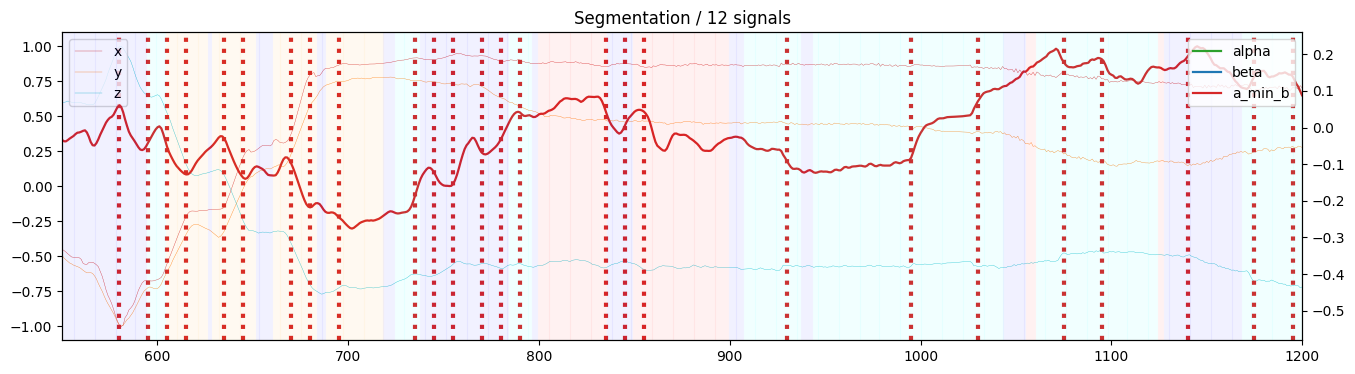

In [7]:

# acc_z_r and alpha_minus_beta are strongly corelated
stacked_data=np.vstack([acc_x_r,acc_y_r,acc_z_r,gyr_x_n,gyr_y_n,gyr_z_n,gyr_x_r,gyr_y_r,gyr_z_r,alpha_r,beta_r,alpha_min_beta]).T
plot_segments(acc_x_r,acc_y_r,acc_z_r,0,0,alpha_min_beta,stacked_data,window_size,penalty,range_start,range_end)


42 points detected using window size=  16  and penalty= 0.33


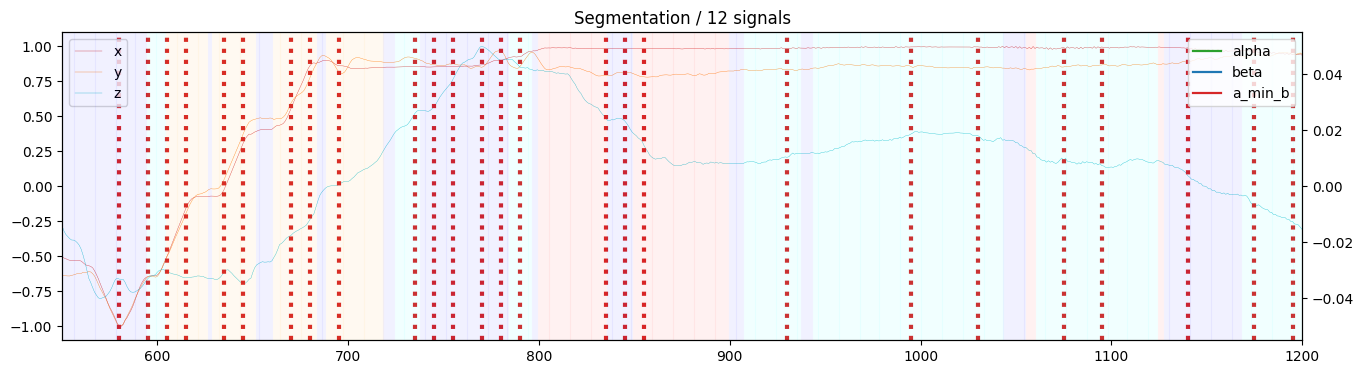

In [8]:

# acc_x_n is correlated with labels > smooth?
stacked_data=np.vstack([acc_x_r,acc_y_r,acc_z_r,gyr_x_n,gyr_y_n,gyr_z_n,gyr_x_r,gyr_y_r,gyr_z_r,alpha_r,beta_r,alpha_min_beta]).T
plot_segments(acc_x_n,acc_y_n,acc_z_n,0,0,0,stacked_data,window_size,penalty,range_start,range_end)


42 points detected using window size=  16  and penalty= 0.33


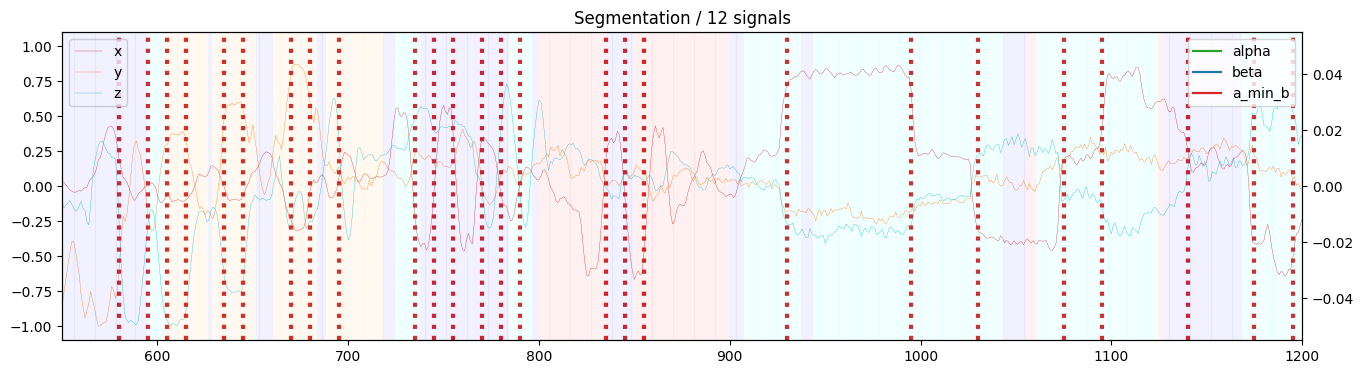

In [9]:

# gyr_xxx_n 
stacked_data=np.vstack([acc_x_r,acc_y_r,acc_z_r,gyr_x_n,gyr_y_n,gyr_z_n,gyr_x_r,gyr_y_r,gyr_z_r,alpha_r,beta_r,alpha_min_beta]).T
plot_segments(gyr_x_n,gyr_y_n,gyr_z_n,0,0,0,stacked_data,window_size,penalty,range_start,range_end)


42 points detected using window size=  16  and penalty= 0.33


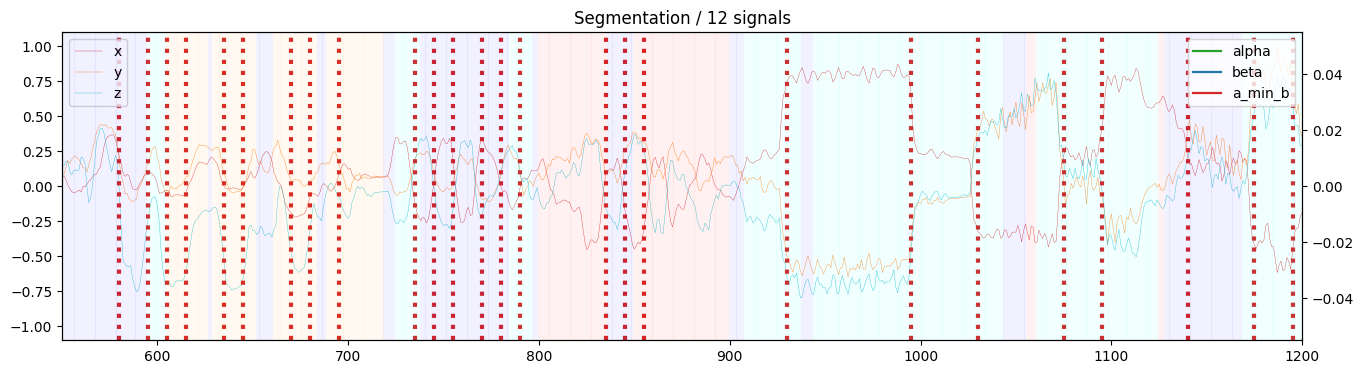

In [10]:

# gyr_xxx_r is strongly correlated with DELAYED labels > include in vstack
stacked_data=np.vstack([acc_x_r,acc_y_r,acc_z_r,gyr_x_n,gyr_y_n,gyr_z_n,gyr_x_r,gyr_y_r,gyr_z_r,alpha_r,beta_r,alpha_min_beta]).T
plot_segments(gyr_x_r,gyr_y_r,gyr_z_r,0,0,0,stacked_data,window_size,penalty,range_start,range_end)

42 points detected using window size=  16  and penalty= 0.33


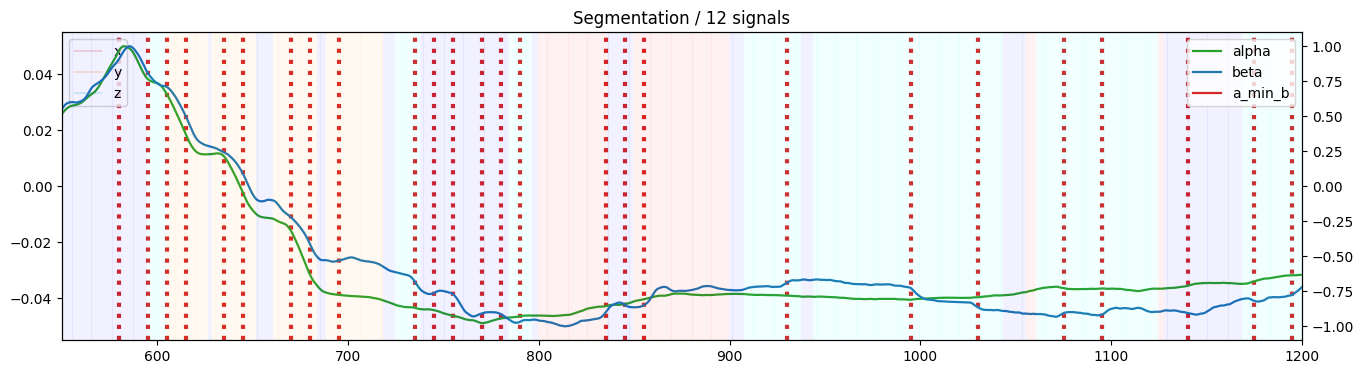

In [11]:

# alpha and beta are correlated with labels for high swings > high penalty in vstack
stacked_data=np.vstack([acc_x_r,acc_y_r,acc_z_r,gyr_x_n,gyr_y_n,gyr_z_n,gyr_x_r,gyr_y_r,gyr_z_r,alpha_r,beta_r,alpha_min_beta]).T
plot_segments(0,0,0,alpha_r,beta_r,0,stacked_data,window_size,penalty,range_start,range_end)

42 points detected using window size=  16  and penalty= 0.33


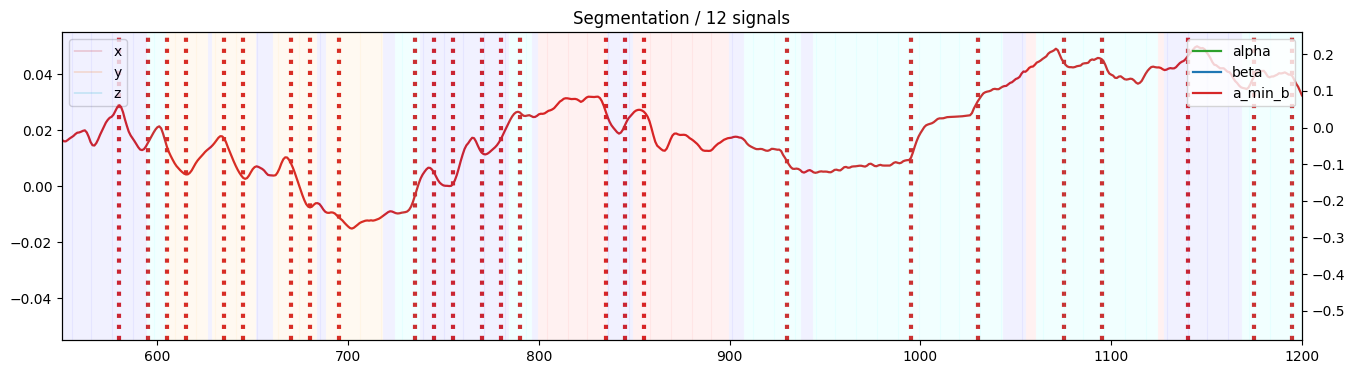

In [12]:

# alpha_min_beta is not correlated with labels > exclude from vstack
stacked_data=np.vstack([acc_x_r,acc_y_r,acc_z_r,gyr_x_n,gyr_y_n,gyr_z_n,gyr_x_r,gyr_y_r,gyr_z_r,alpha_r,beta_r,alpha_min_beta]).T
plot_segments(0,0,0,0,0,alpha_min_beta,stacked_data,window_size,penalty,range_start,range_end)

42 points detected using window size=  16  and penalty= 0.33


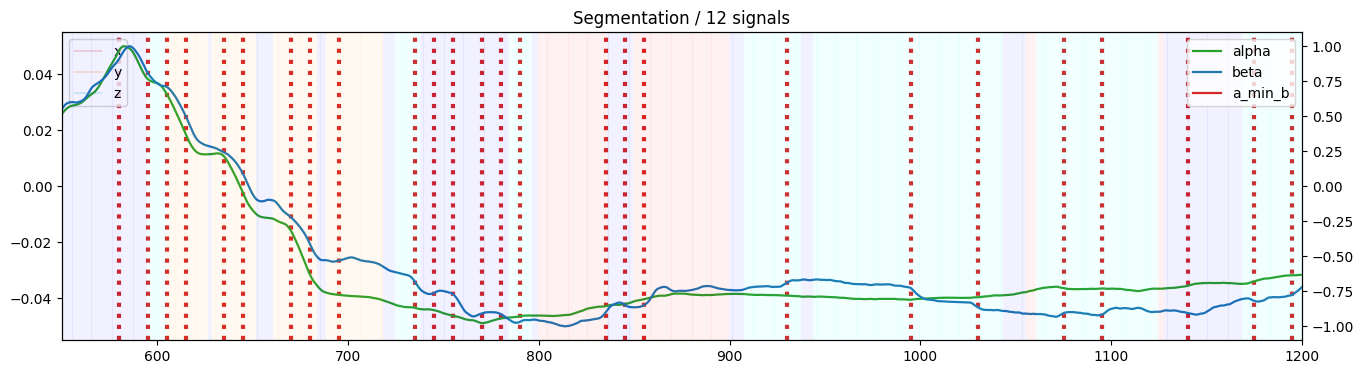

In [13]:

# acc_z_r and alpha_minus_beta are strongly corelated > use one of both
# acc_x_n is correlated with labels > smooth?
# gyr_xxx_n is not correlated with labels > not include in vstack
# gyr_xxx_r is strongly correlated with DELAYED labels > include in vstack
# alpha and beta are correlated with labels for high swings > high penalty in vstack
stacked_data=np.vstack([acc_x_r,acc_y_r,acc_z_r,gyr_x_n,gyr_y_n,gyr_z_n,gyr_x_r,gyr_y_r,gyr_z_r,alpha_r,beta_r,alpha_min_beta]).T
plot_segments(0,0,0,alpha_r,beta_r,0,stacked_data,window_size,penalty,range_start,range_end)

In [14]:
range_start=0
range_end=len(df_resampled)

7 points detected using window size=  200  and penalty= 2.5


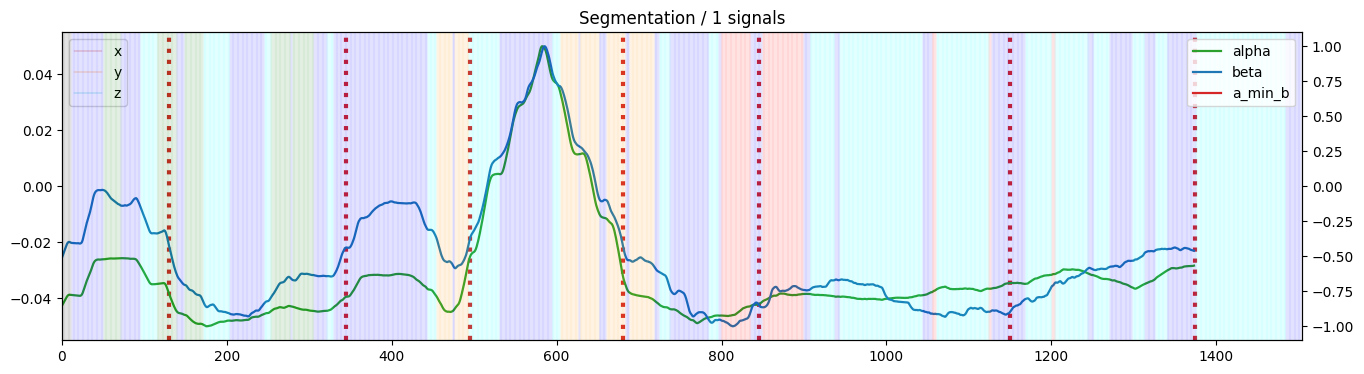

In [15]:
# Start with alpha and a high penalty
penalty=2.5
window_size=200
stacked_data=np.vstack([alpha_r]).T
plot_segments(0,0,0,alpha_r,beta_r,0,stacked_data,window_size,penalty,range_start,range_end)

13 points detected using window size=  64  and penalty= 1.2


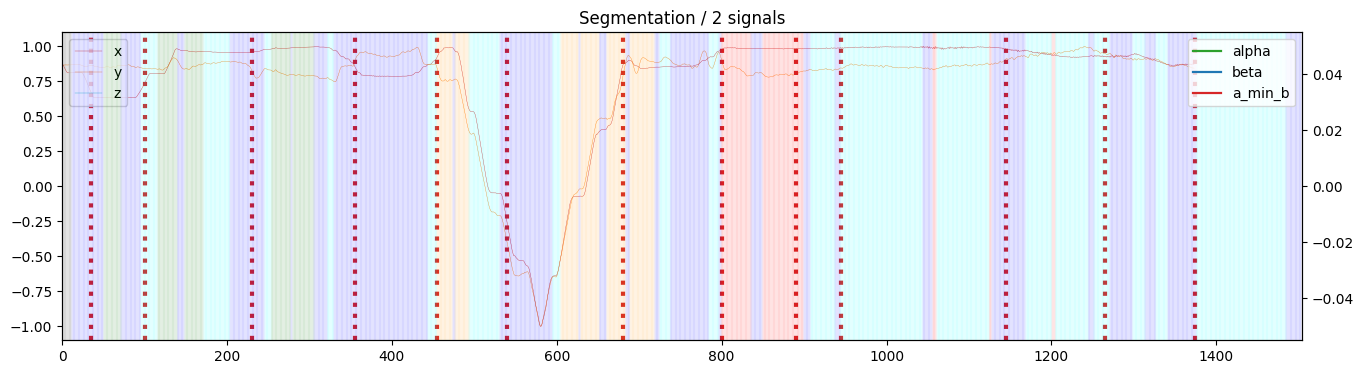

In [16]:
# Now add  acc_x_n and y from neck 
penalty=1.2
window_size=64
stacked_data=np.vstack([acc_x_n,acc_y_n]).T
plot_segments(acc_x_n,acc_y_n,0,0,0,0,stacked_data,window_size,penalty,range_start,range_end)

16 points detected using window size=  64  and penalty= 0.87


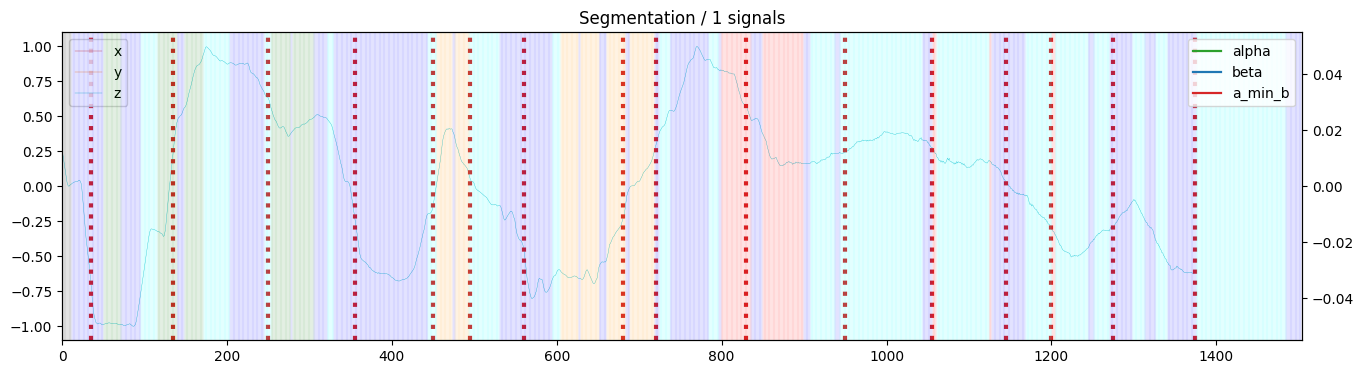

In [17]:
# Now add  acc_z_n  from neck 
penalty=.87
window_size=64
stacked_data=np.vstack([acc_z_n]).T
plot_segments(0,0,acc_z_n,0,0,0,stacked_data,window_size,penalty,range_start,range_end)

14 points detected using window size=  64  and penalty= 0.8


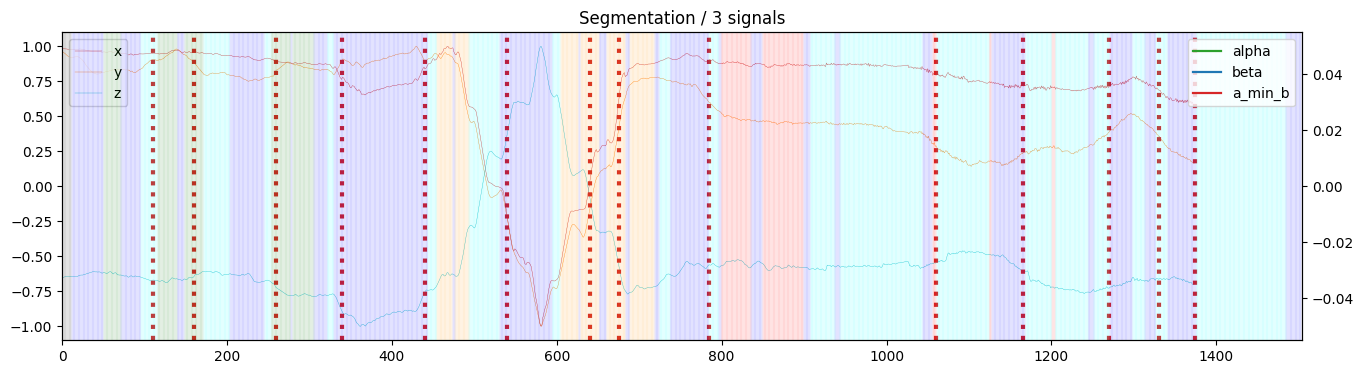

In [18]:
# Now add acc from belt  
penalty=.8
window_size=64
stacked_data=np.vstack([acc_x_r,acc_y_r,acc_z_r]).T
plot_segments(acc_x_r,acc_y_r,acc_z_r,0,0,0,stacked_data,window_size,penalty,range_start,range_end)

11 points detected using window size=  100  and penalty= 2.96


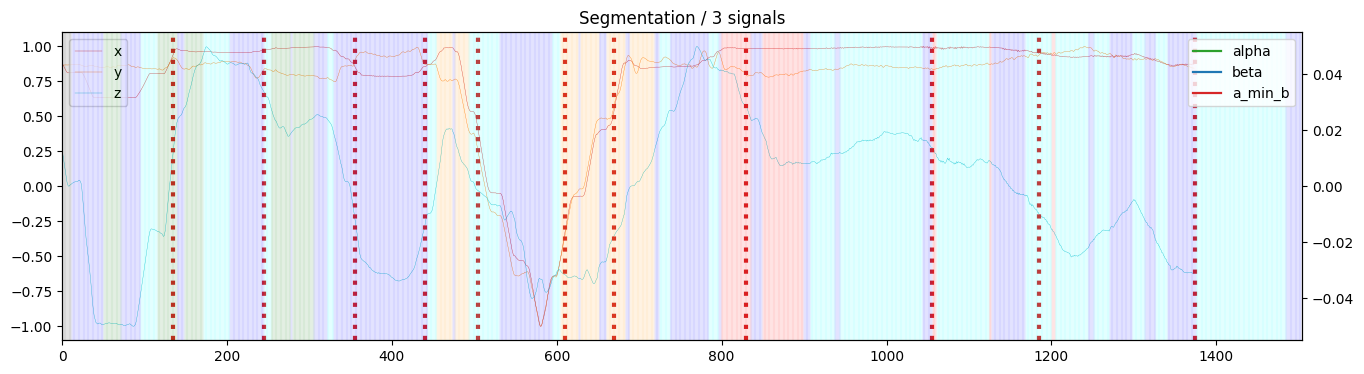

In [19]:
# Now add acc_z from neck  
penalty=2.96
window_size=100
stacked_data=np.vstack([acc_x_n,acc_y_n,acc_z_n]).T
plot_segments(acc_x_n,acc_y_n,acc_z_n,0,0,0,stacked_data,window_size,penalty,range_start,range_end)

8 points detected using window size=  128  and penalty= 8


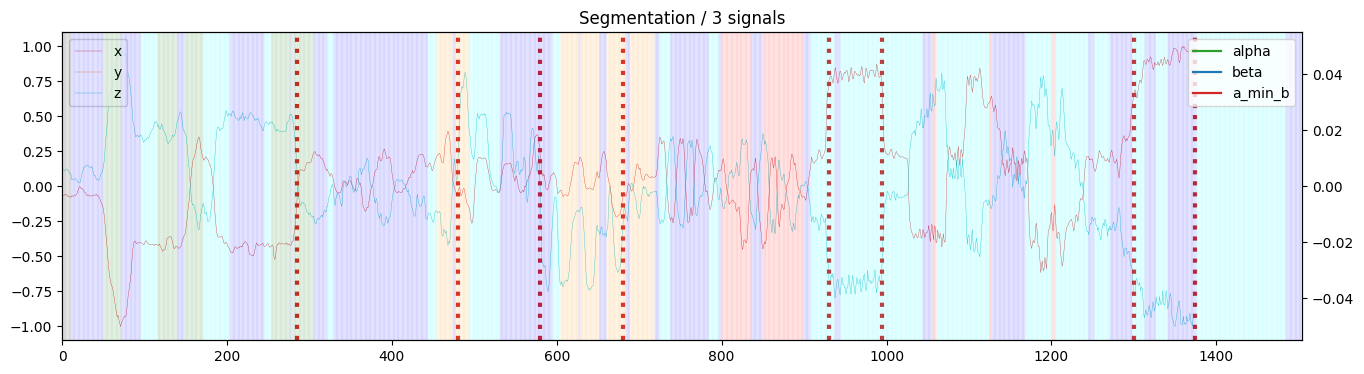

In [20]:
# Now add gyr_xxx_r

penalty= 8
window_size=128
stacked_data=np.vstack([gyr_x_r,gyr_y_r,gyr_z_r]).T
plot_segments(gyr_x_r,0,gyr_z_r,0,0,0,stacked_data,window_size,penalty,range_start,range_end)

13 points detected using window size=  64  and penalty= 4.62


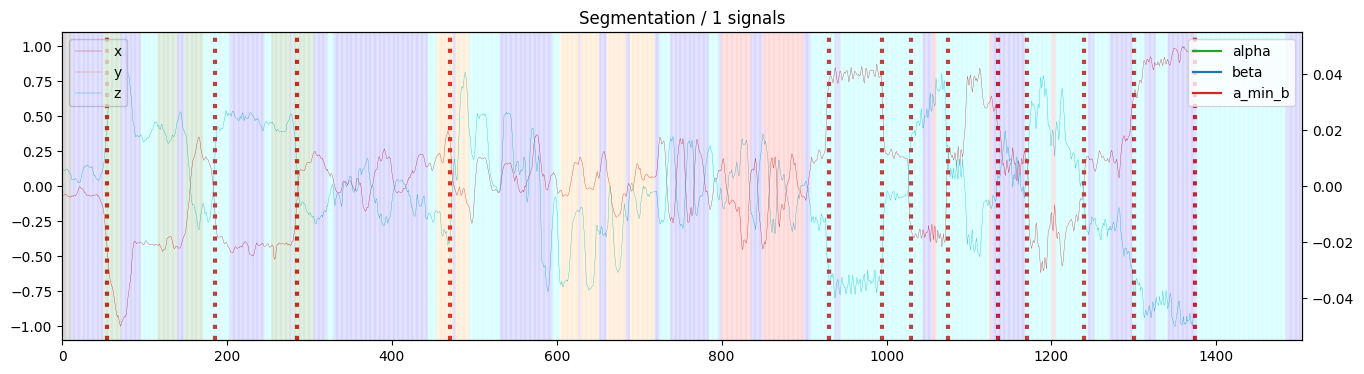

In [21]:
# Now add   
# gyr_x_r 
penalty= 4.62
window_size=64
stacked_data=np.vstack([gyr_x_r]).T
plot_segments(gyr_x_r,0,gyr_z_r,0,0,0,stacked_data,window_size,penalty,range_start,range_end)

19 points detected using window size=  64  and penalty= 2.1


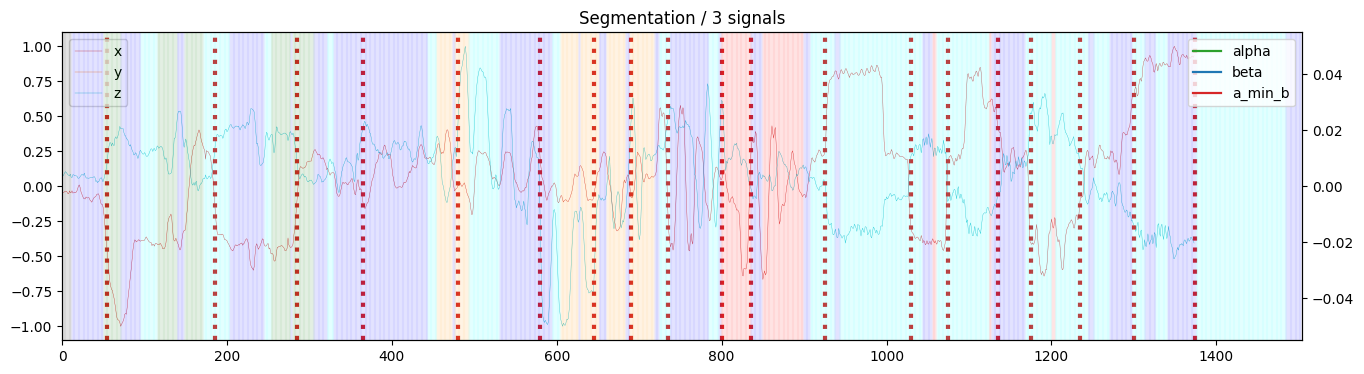

In [22]:
# Now add  gyr_xxx_n  
penalty= 2.1
window_size=64
stacked_data=np.vstack([gyr_x_n,gyr_y_n,gyr_z_n]).T
plot_segments(gyr_x_n,0,gyr_z_n,0,0,0,stacked_data,window_size,penalty,range_start,range_end)

11 points detected using window size=  64  and penalty= 3.34


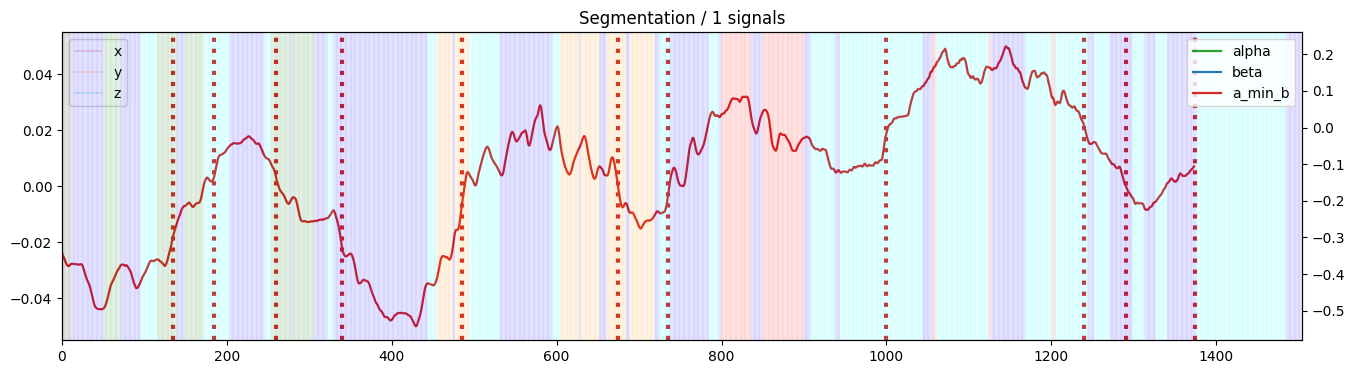

In [23]:
# Now add  alpha_min_beta
penalty= 3.34
window_size=64
stacked_data=np.vstack([alpha_min_beta]).T
plot_segments(0,0,0,0,0,alpha_min_beta,stacked_data,window_size,penalty,range_start,range_end)

In [24]:
def segment(stacked_data,window_size,penalty,method):

    #Window-based approach 
    if method=='window':
        algo = rpt.Window(width=window_size, model='rbf').fit(stacked_data)
        results = algo.predict(pen=penalty) 

    # Radial basis function kernel
    if method=='pelt':
        algo=rpt.Pelt(model='rbf').fit(stacked_data)
        results=algo.predict(pen=penalty) 
    
    return results


def clean_results(all_results,method,datapoints):
    new_results = []
    i = 0
    while i < len(all_results) - 1:
        if all_results[i+1] - all_results[i] <= datapoints:
            if method=='avg':
                method_result = (all_results[i] + all_results[i+1])/2
            if method=='first':
                method_result=all_results[i]
            if method=='last':
                method_result=all_results[i+1]
            new_results.append(method_result)
            i += 2
        else:
            new_results.append(all_results[i])
            i += 1

    # Add the last value to the new list if it wasn't already added
    if i == len(all_results) - 1:
        new_results.append(all_results[-1])
    new_results = [*set(new_results)]
    new_results.sort()   
    return new_results

def get_changepoints():
    
    all_results=[]

    method='window'

    # Add acc_x_n and y from neck 
    penalty=1.2
    window_size=64
    stacked_data=np.vstack([acc_x_n,acc_y_n]).T 

    results=segment(stacked_data,window_size,penalty,method)
    all_results.append(results)

    # Now add  acc_z_n  from neck 
    penalty=.87
    window_size=64
    stacked_data=np.vstack([acc_z_n]).T

    results=segment(stacked_data,window_size,penalty,method)
    all_results.append(results)

    # Now add acc from belt  
    penalty=.8
    window_size=64
    stacked_data=np.vstack([acc_x_r,acc_y_r,acc_z_r]).T

    results=segment(stacked_data,window_size,penalty,method)
    all_results.append(results)


    # Now add acc from neck  
    #penalty=.96
    #window_size=50
    #stacked_data=np.vstack([acc_x_n,acc_y_n,acc_z_n]).T

    #results=segment(stacked_data,window_size,penalty,method)
    #all_results.append(results)


    # Now add gyr_xxx_r

    penalty= 8
    window_size=128
    stacked_data=np.vstack([gyr_x_r,gyr_y_r,gyr_z_r]).T

    results=segment(stacked_data,window_size,penalty,method)
    all_results.append(results)

    # Now add  gyr_xxx_n  
    penalty= 2.1
    window_size=64
    stacked_data=np.vstack([gyr_x_n,gyr_y_n,gyr_z_n]).T

    results=segment(stacked_data,window_size,penalty,method)
    all_results.append(results)

 
    all_results = [item for sublist in all_results for item in sublist]
    all_results = [*set(all_results)]

    all_results.sort()   

    print (len(all_results),all_results) 
    all_results=clean_results(all_results,'avg',5)
    #all_results=clean_results(all_results,'first',6)

    #all_results=clean_results(all_results,'last',9)


    print (len(all_results),all_results) 

    return all_results
    


In [25]:
 
def plot_segment(signal1,signal2,signal3,signal4,signal5,signal6,range_start,range_end):
    label_colors = {'kalibratie': 'black', 'staan': 'blue',   'armen_hoog':'green', 'wandelen':'cyan', 'buiging':'orange',
        'draaien':'red'}
 
    results = get_changepoints()

    # Draw the gyroscope plot
    fig,ax=plt.subplots(figsize=(16, 4))
    plt.title(f'Changepoints (window method)')

    axb=ax.twinx()

    signal_list=[signal1,signal2,signal3,signal4,signal5,signal6]
    ax.plot(signal_list[0],color='tab:red',linewidth=.25 , label ='x' , alpha=1)
    ax.plot(signal_list[1],color='tab:orange',linewidth=.25 , label ='y' , alpha=1)
    ax.plot(signal_list[2],color='tab:cyan',linewidth=.25 , label ='z'  , alpha=1)
    ax.set_xlim(range_start,range_end)
    axb.plot(signal_list[3],color='tab:green',linewidth=1.6 , label ='alpha')
    axb.plot(signal_list[4],color='tab:blue',linewidth=1.6 , label ='beta')
    axb.plot(signal_list[5],color='tab:red',linewidth=1.6 , label ='a_min_b')
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1))
    axb.legend(loc='upper right', bbox_to_anchor=(1, 1))

    unique_labels = np.unique(df_resampled['label'].values)
    label_colors = {label:label_colors[label] for label in unique_labels if label in label_colors}

    for index, label in df['label'].items():
    
        if label in label_colors:
            color = label_colors[label]
            plt.axvline(x=index, color=color, label=label, alpha=0.05)
    

    # Draw the change points
    cnt=int(0)
    for r in results:
        ax.axvline(x=r,color="tab:red",linewidth=3,linestyle=':')
        cnt+=1


    # Result
    print (cnt,'points detected using penalty=',penalty)
    


55 [35, 55, 100, 110, 135, 160, 185, 230, 250, 260, 285, 340, 355, 365, 440, 450, 455, 480, 495, 540, 560, 580, 640, 645, 675, 680, 690, 720, 735, 785, 800, 830, 835, 890, 925, 930, 945, 950, 995, 1030, 1055, 1060, 1075, 1135, 1145, 1165, 1175, 1200, 1235, 1265, 1270, 1275, 1300, 1330, 1374]
47 [35, 55, 100, 110, 135, 160, 185, 230, 250, 260, 285, 340, 355, 365, 440, 452.5, 480, 495, 540, 560, 580, 642.5, 677.5, 690, 720, 735, 785, 800, 832.5, 890, 927.5, 947.5, 995, 1030, 1057.5, 1075, 1135, 1145, 1165, 1175, 1200, 1235, 1267.5, 1275, 1300, 1330, 1374]
47 points detected using penalty= 3.34


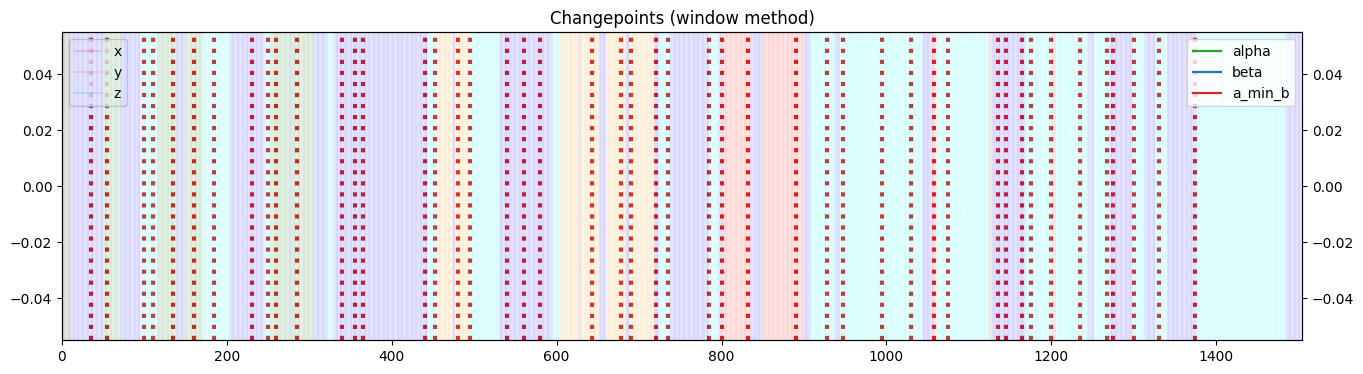

In [26]:
#NEW_STYLE
plot_segment(0,0,0,0,0,0,range_start,range_end)

55 [35, 55, 100, 110, 135, 160, 185, 230, 250, 260, 285, 340, 355, 365, 440, 450, 455, 480, 495, 540, 560, 580, 640, 645, 675, 680, 690, 720, 735, 785, 800, 830, 835, 890, 925, 930, 945, 950, 995, 1030, 1055, 1060, 1075, 1135, 1145, 1165, 1175, 1200, 1235, 1265, 1270, 1275, 1300, 1330, 1374]
47 [35, 55, 100, 110, 135, 160, 185, 230, 250, 260, 285, 340, 355, 365, 440, 452.5, 480, 495, 540, 560, 580, 642.5, 677.5, 690, 720, 735, 785, 800, 832.5, 890, 927.5, 947.5, 995, 1030, 1057.5, 1075, 1135, 1145, 1165, 1175, 1200, 1235, 1267.5, 1275, 1300, 1330, 1374]
47 points detected using penalty= 3.34


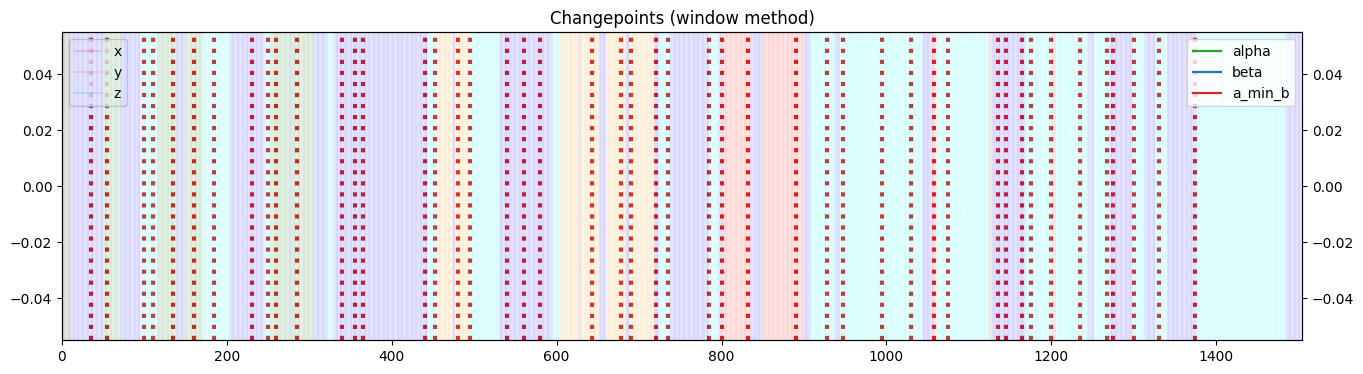

In [27]:
#NEW_STYLE
plot_segment(0,0,0,0,0,0,range_start,range_end)

40 points detected using window size=  24  and penalty= 0.33


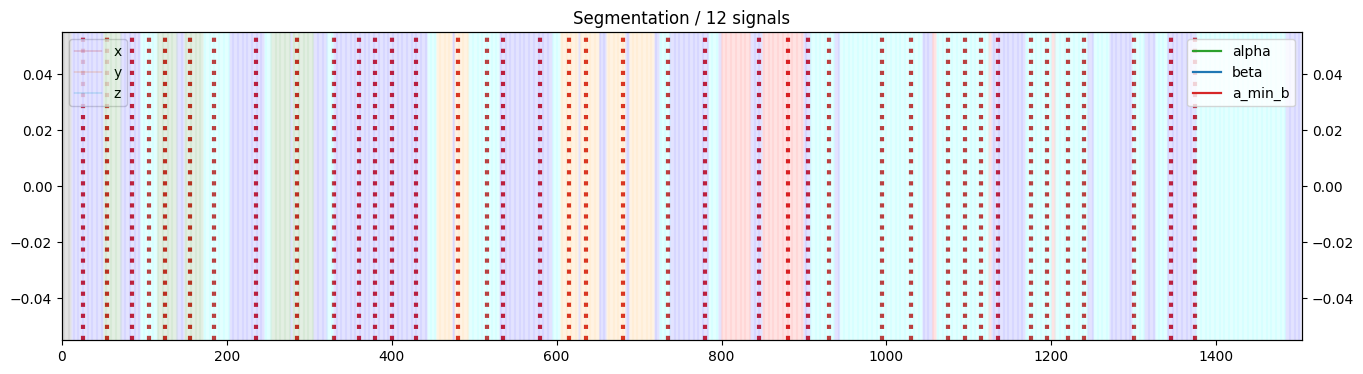

In [28]:
# CLASSIC_STYLE
window_size =24
penalty=0.33
stacked_data=np.vstack([acc_x_r,acc_y_r,acc_z_r,gyr_x_n,gyr_y_n,gyr_z_n,gyr_x_r,gyr_y_r,gyr_z_r,alpha_r,beta_r,alpha_min_beta]).T
plot_segments(0,0,0,0,0,0,stacked_data,window_size,penalty,range_start,range_end)


In [29]:
# The labels are often LATE > advance them?

In [30]:
stacked_data.shape[1]

12

In [31]:
# ideas for Feature engineering
# Variation (amplitude)
# slope (horizontal, up, down)

# Meaningful for clustering
 

In [32]:
# Function to extract a frame

def get_frame(start,end):

    acc_x_n=np.array(df['acc_x_n'][start:end])
    acc_y_n=np.array(df['acc_y_n'][start:end])
    acc_z_n=np.array(df['acc_z_n'][start:end])
    gyr_x_n=np.array(df['gyr_x_n'][start:end])
    gyr_y_n=np.array(df['gyr_y_n'][start:end])
    gyr_z_n=np.array(df['gyr_z_n'][start:end])

    alpha_r=np.array(df['alpha_r'][start:end])
    beta_r = np.array(df['beta_r'][start:end])
     
    # Normalise
    alpha_r = (alpha_r - alpha_r_c.min()) * (2/(alpha_r_c.max() - alpha_r_c.min())) - 1
    beta_r = (beta_r - beta_r_c.min()) * (2/(beta_r_c.max() - beta_r_c.min())) - 1

    gyr_x_n = (gyr_x_n - gyr_x_n_c.min()) * (2/(gyr_x_n_c.max() - gyr_x_n_c.min())) 
    gyr_y_n = (gyr_y_n - gyr_y_n_c.min()) * (2/(gyr_y_n_c.max() - gyr_y_n_c.min())) 
    gyr_z_n = (gyr_z_n - gyr_z_n_c.min()) * (2/(gyr_z_n_c.max() - gyr_z_n_c.min())) 

    return acc_x_n,acc_y_n,acc_z_n,gyr_x_n,gyr_y_n,gyr_z_n,alpha_r,beta_r

# Function to plot a graph of a frame

def plot_frame(acc_x_n,acc_y_n,acc_z_n,gyr_x_n,gyr_y_n,gyr_z_n,alpha_r,beta_r,i):
    fig,ax=plt.subplots(figsize=(16, 4))

    plt.title(f'frame {i+1}')

    axb=ax.twinx()
    ax.plot(acc_x_n,color='tab:red',linewidth=.9 , label ='acc (x)', alpha=0.4)
    ax.plot(acc_y_n,color='tab:orange',linewidth=.9 , label ='acc (y)', alpha=0.4)
    ax.plot(acc_z_n,color='tab:cyan',linewidth=.9 , label ='acc (z)' , alpha=0.4)

    ax.plot(gyr_x_n,color='tab:red',linewidth=.9 , label ='gyr (x)', linestyle=':', alpha=0.66)
    ax.plot(gyr_y_n,color='tab:orange',linewidth=.9 , label ='gyr (y)', linestyle=':', alpha=0.66)
    ax.plot(gyr_z_n,color='tab:cyan',linewidth=.9 , label ='gyr (z)' , linestyle=':', alpha=0.66)

    axb.plot(alpha_r,color='tab:green',linewidth=1.6 , label ='alpha')
    axb.plot(beta_r,color='tab:blue',linewidth=1.6 , label ='beta')
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1))
    axb.legend(loc='upper right', bbox_to_anchor=(1, 1))
    
    plt.show()


In [33]:
# Make frames from the change points

offset=ts_start

change_points=[]
start_point=[]
end_point=[]

results=get_changepoints()

for r in results:
    change_points.append(r)

start_point.append(0 + offset)
for i in range(0,len(change_points)-1,1):
    #print (i)
    end_point.append( change_points[i] + offset + resample_rate)
    start_point.append( change_points[i] + offset - resample_rate)
end_point.append(change_points[len(change_points)-1] + offset )
print (f'{len(change_points)} frames detected')
print(change_points)
print (start_point)
print (end_point)

55 [35, 55, 100, 110, 135, 160, 185, 230, 250, 260, 285, 340, 355, 365, 440, 450, 455, 480, 495, 540, 560, 580, 640, 645, 675, 680, 690, 720, 735, 785, 800, 830, 835, 890, 925, 930, 945, 950, 995, 1030, 1055, 1060, 1075, 1135, 1145, 1165, 1175, 1200, 1235, 1265, 1270, 1275, 1300, 1330, 1374]
47 [35, 55, 100, 110, 135, 160, 185, 230, 250, 260, 285, 340, 355, 365, 440, 452.5, 480, 495, 540, 560, 580, 642.5, 677.5, 690, 720, 735, 785, 800, 832.5, 890, 927.5, 947.5, 995, 1030, 1057.5, 1075, 1135, 1145, 1165, 1175, 1200, 1235, 1267.5, 1275, 1300, 1330, 1374]
47 frames detected
[35, 55, 100, 110, 135, 160, 185, 230, 250, 260, 285, 340, 355, 365, 440, 452.5, 480, 495, 540, 560, 580, 642.5, 677.5, 690, 720, 735, 785, 800, 832.5, 890, 927.5, 947.5, 995, 1030, 1057.5, 1075, 1135, 1145, 1165, 1175, 1200, 1235, 1267.5, 1275, 1300, 1330, 1374]
[31, 62, 82, 127, 137, 162, 187, 212, 257, 277, 287, 312, 367, 382, 392, 467, 479.5, 507, 522, 567, 587, 607, 669.5, 704.5, 717, 747, 762, 812, 827, 859.5, 9

In [34]:
frame_data=[]

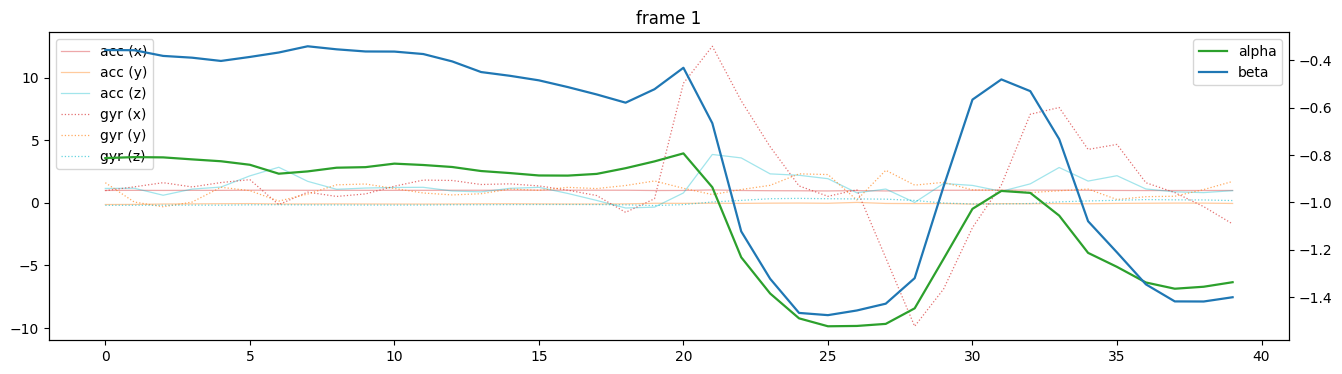

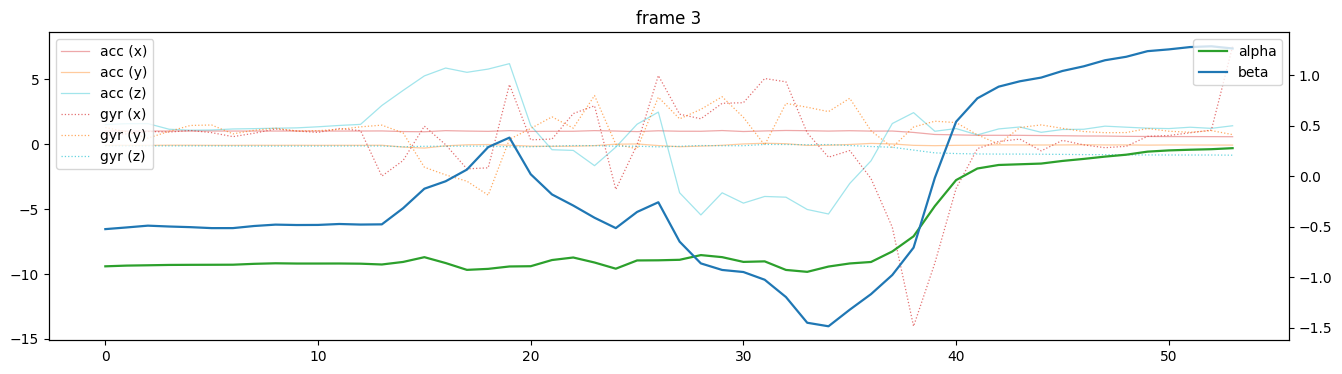

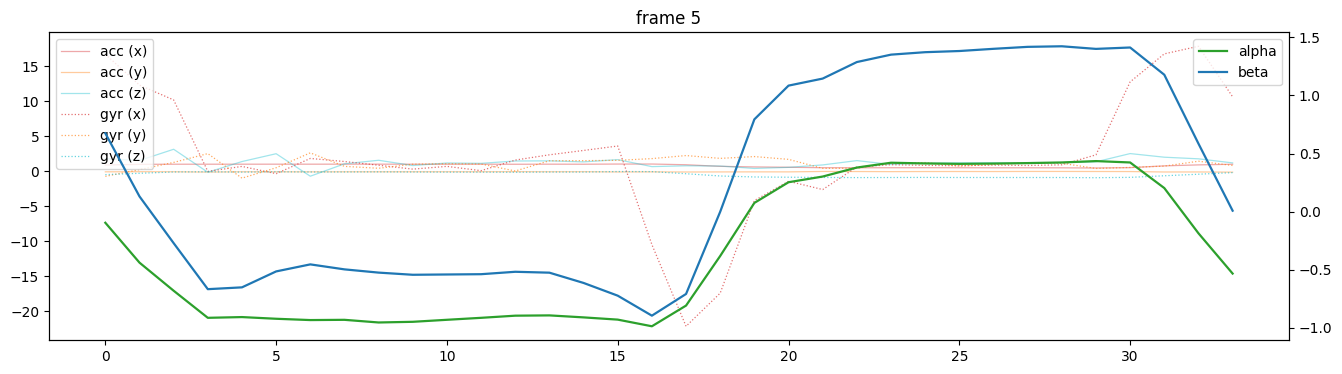

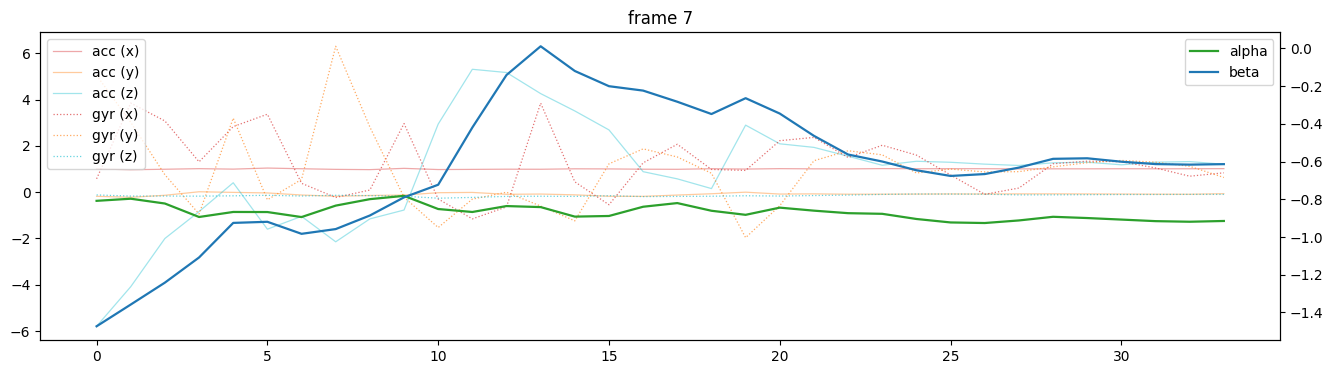

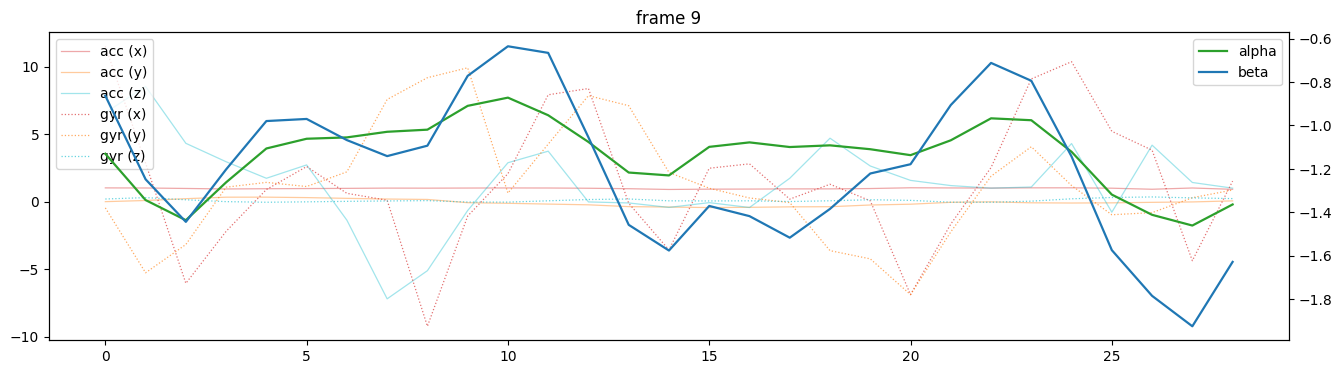

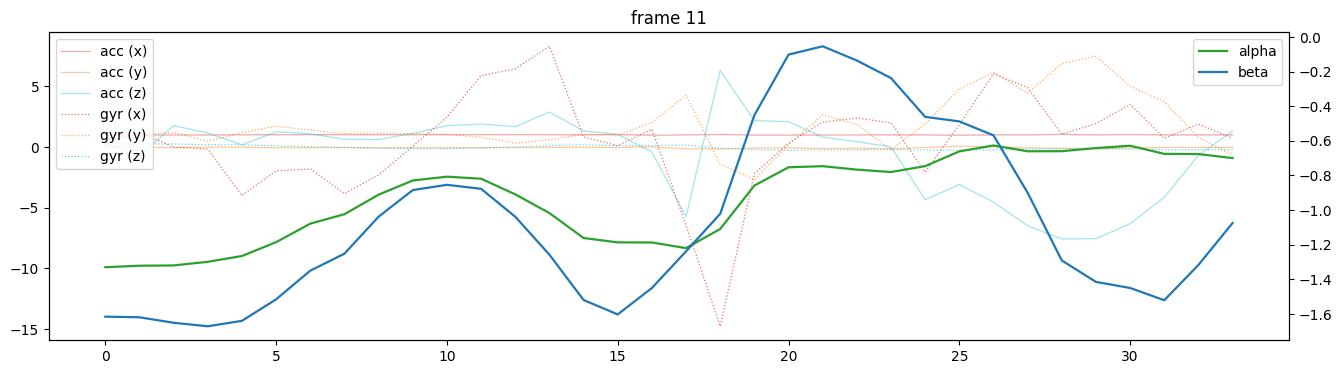

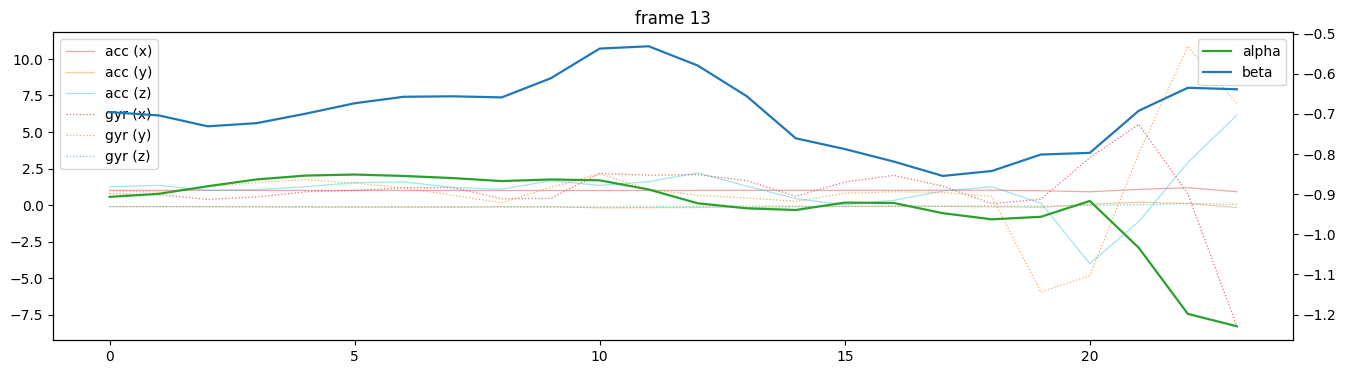

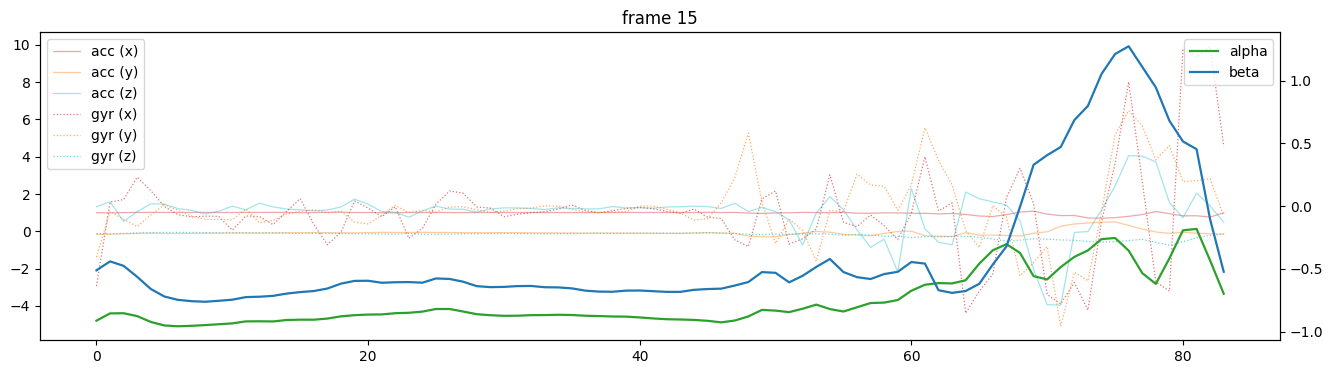

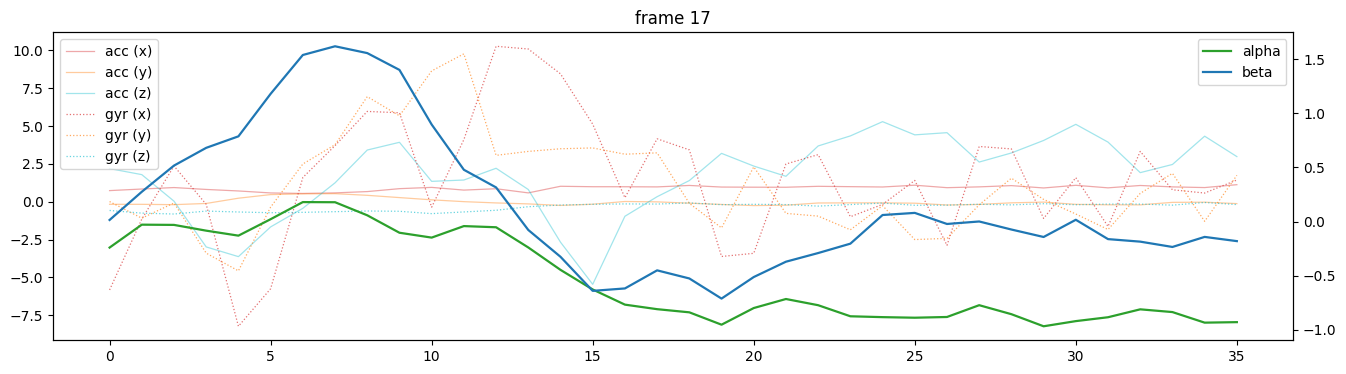

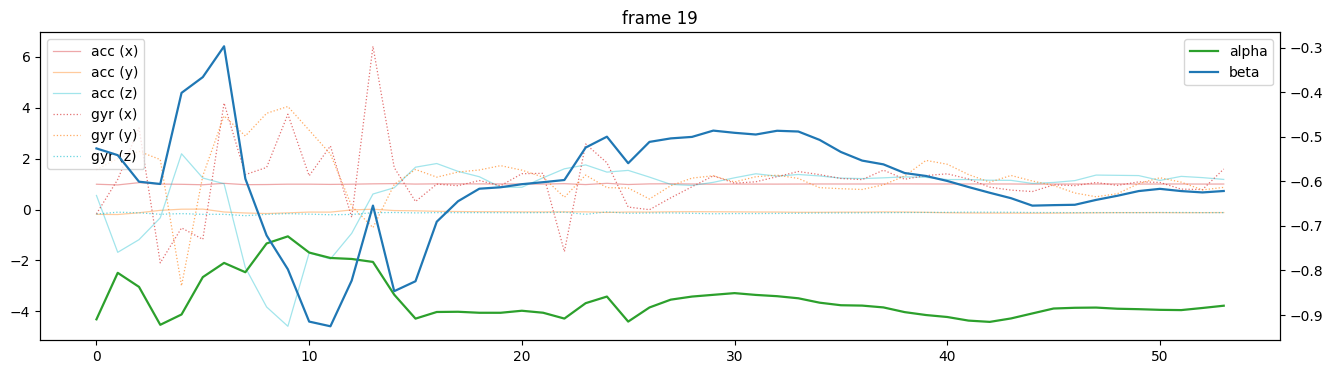

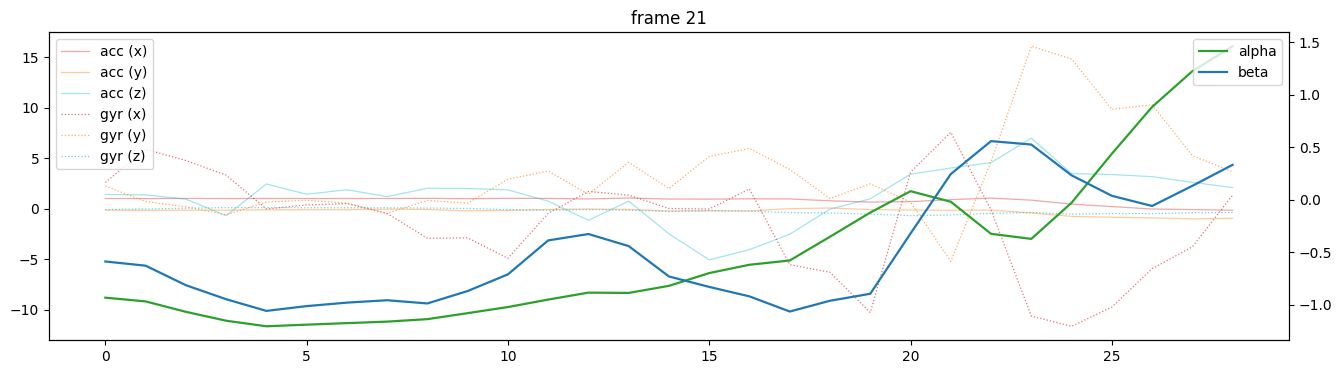

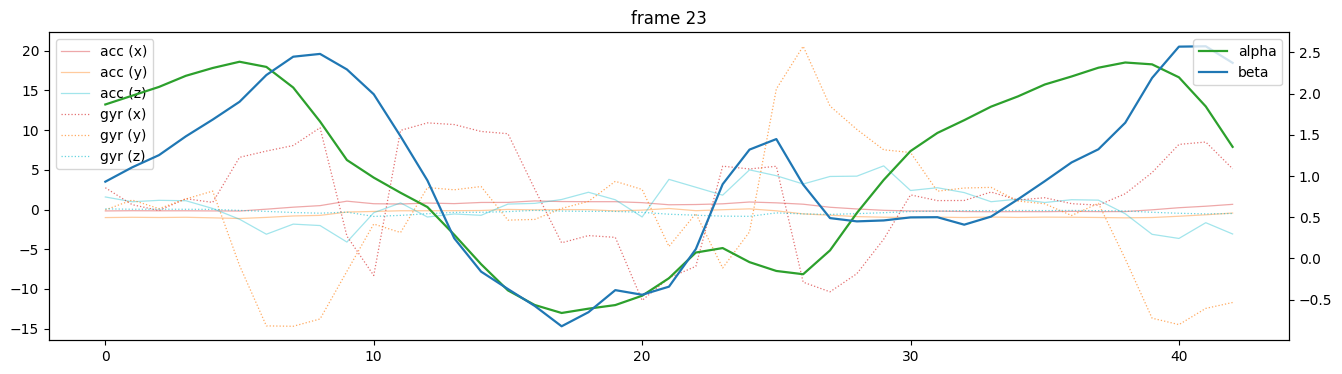

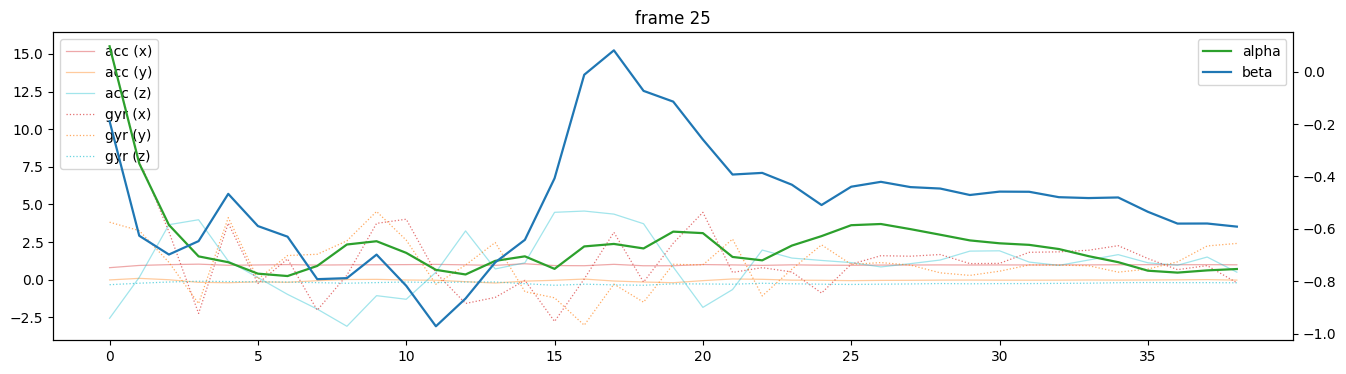

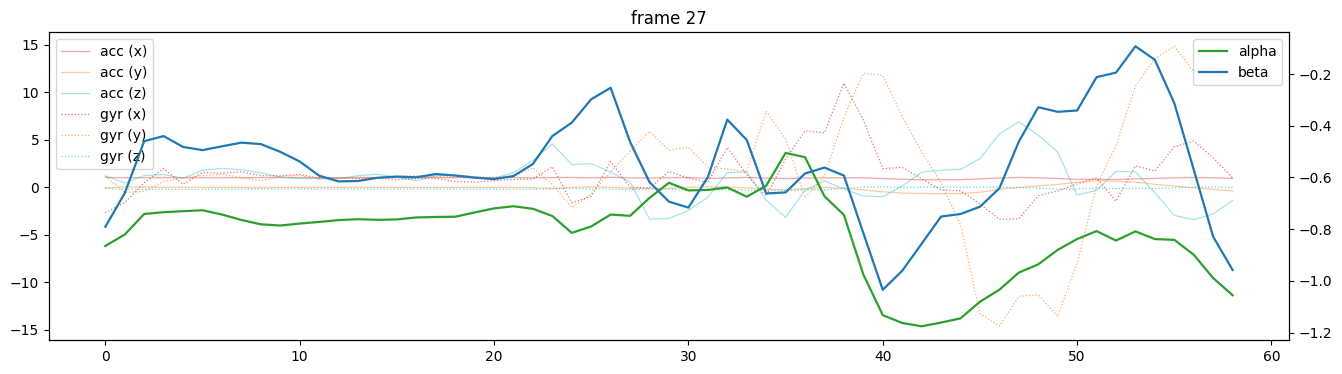

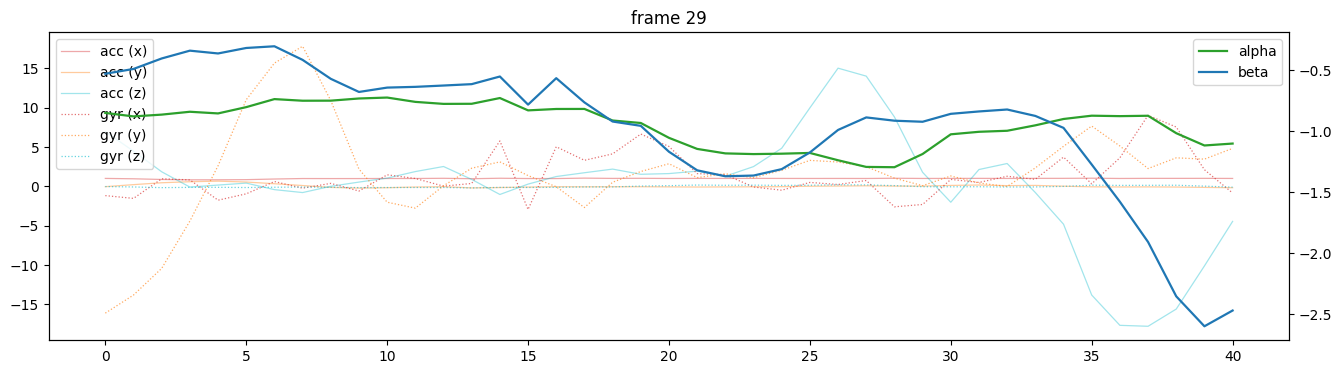

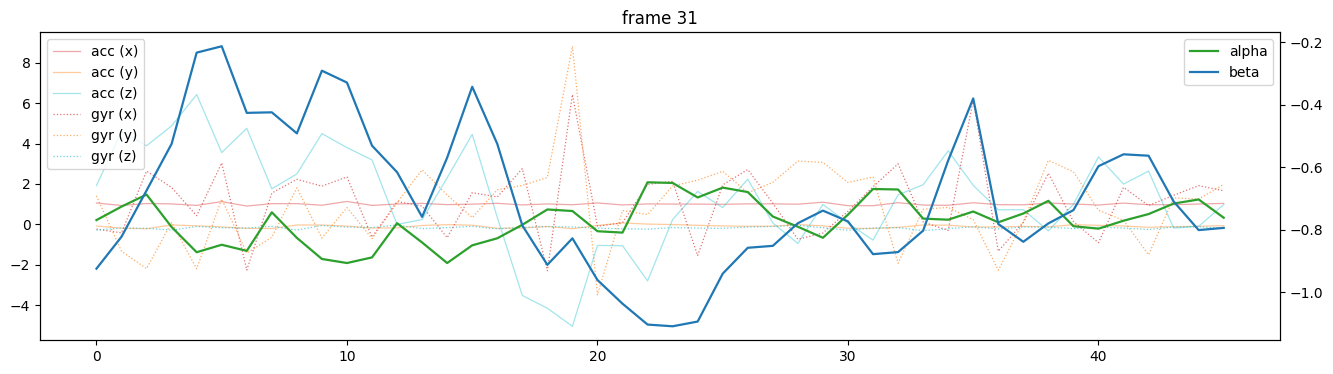

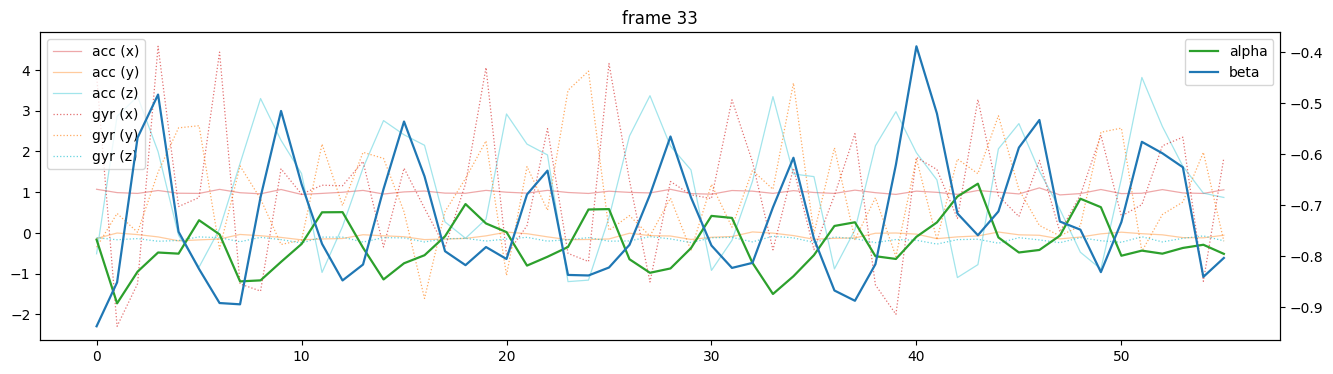

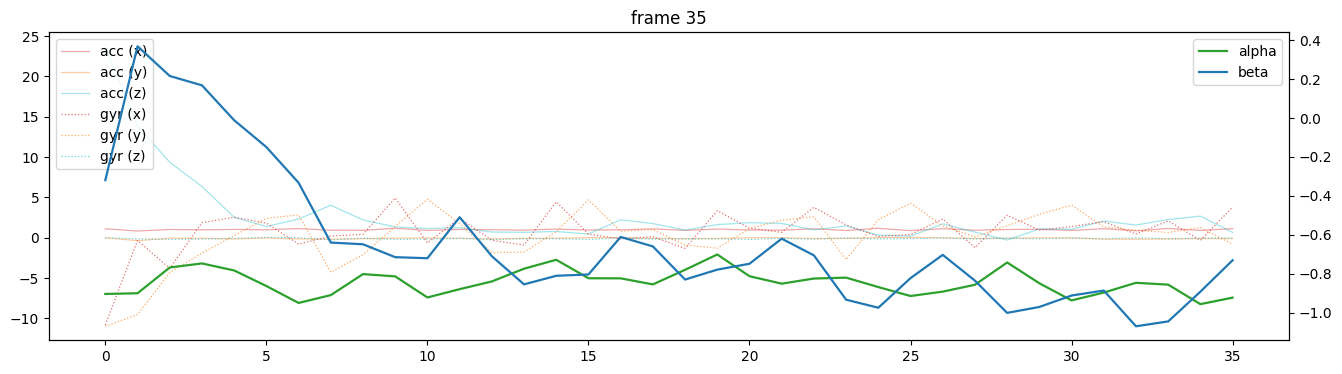

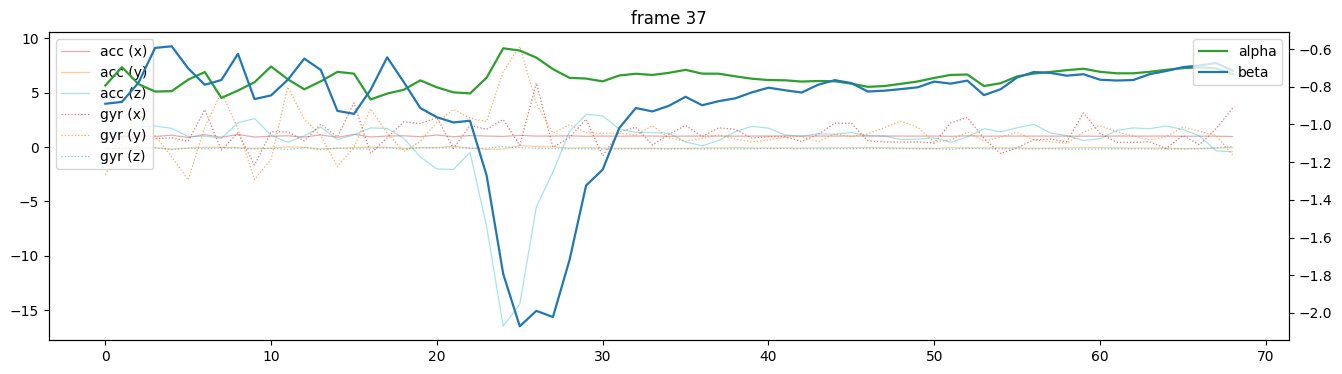

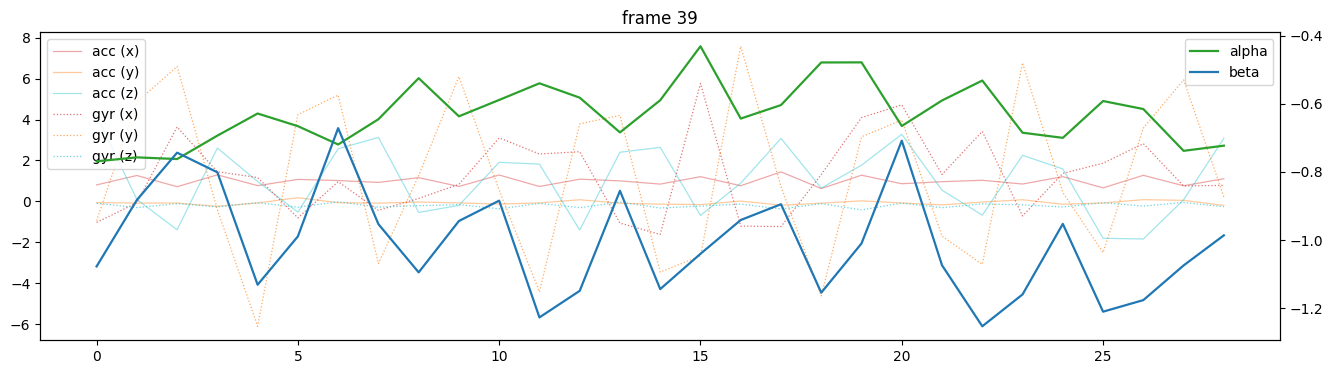

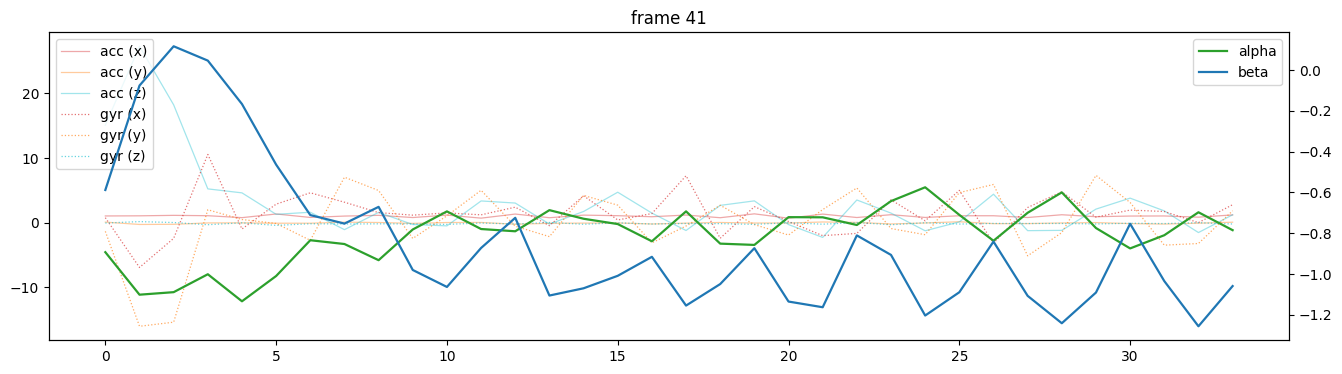

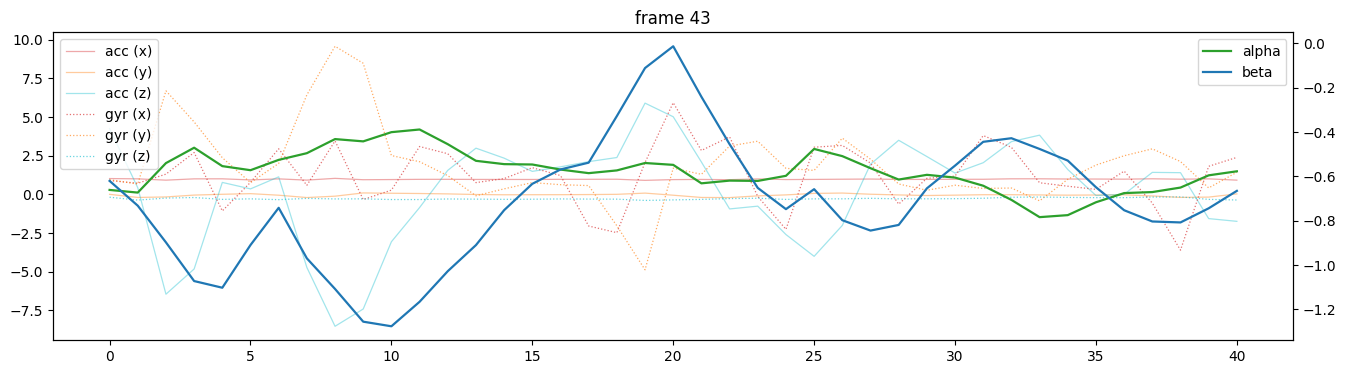

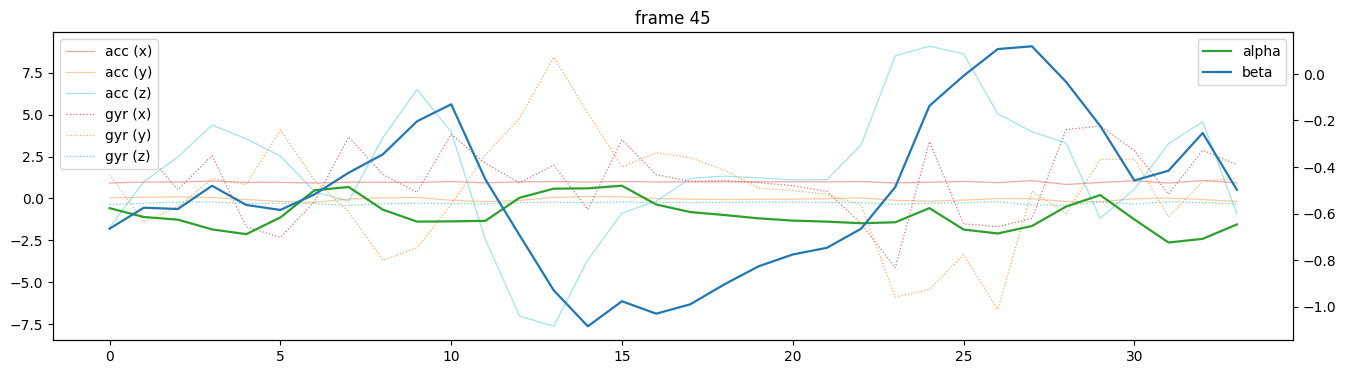

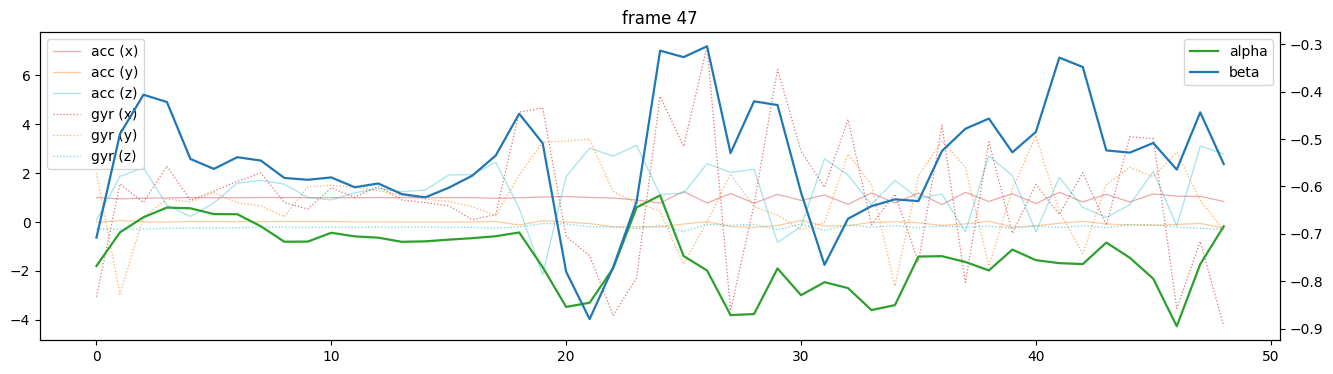

In [35]:
for i in range(len(change_points)):
    acc_x_n,acc_y_n,acc_z_n,gyr_x_n,gyr_y_n,gyr_z_n, alpha_r,beta_r=get_frame(start_point[i],end_point[i])
    frame_data.append(np.vstack([acc_x_n,acc_y_n,acc_z_n,gyr_x_n,gyr_y_n,gyr_z_n,alpha_r,beta_r]).T)
    if i%2==0:
        plot_frame(acc_x_n,acc_y_n,gyr_x_n,gyr_y_n,gyr_z_n,acc_z_n,alpha_r,beta_r,i)

In [36]:
print(frame_data[0].shape)

(40, 8)


In [37]:
df1=pd.DataFrame(data=frame_data[0], columns=['acc_x_n','acc_y_n','acc_z_n','gyr_x_n','gyr_y_n','gyr_z_n','alpha_r','beta_r'])
df1['frame']=1
df1['ts']=df1.index
df1

acc_x_n   acc_y_n   acc_z_n   gyr_x_n    gyr_y_n   gyr_z_n   alpha_r  \
0   0.990438 -0.135905 -0.199341  1.148441   0.974587  1.606155 -0.812628   
1   0.996129 -0.127546 -0.195452  1.164809   1.275702  0.064883 -0.808467   
2   0.989909 -0.094320 -0.191162  0.605954   1.608298 -0.314971 -0.809630   
3   0.996867 -0.084310 -0.183350  1.097321   1.268859  0.060048 -0.818068   
4   0.995076 -0.070394 -0.187500  1.258172   1.617879  1.240613 -0.825985   
5   1.006069 -0.061523 -0.160435  2.151447   1.849386  0.974676 -0.840860   
6   1.005371 -0.090820 -0.152140  2.839802  -0.142277  0.138571 -0.878602   
7   0.999268 -0.092204 -0.165405  1.716488   0.854141  0.700423 -0.868926   
8   1.001302 -0.085693 -0.167074  1.080134   0.510596  1.436922 -0.853287   
9   0.998082 -0.092669 -0.177037  1.180296   0.710231  1.503842 -0.850942   
10  0.997721 -0.096354 -0.178874  1.225561   1.326344  1.144489 -0.836085   
11  0.997111 -0.098918 -0.175090  1.238782   1.816341  0.785716 -0.841852   
12  1.005819 -0.093343 -0.153727  0.946165   1.784861  0.631376 -0.850290   
13  1.004011 -0.078648 -0.152204  0.875844   1.463411  0.725179 -0.867334   
14  1.007690 -0.074341 -0.141520  1.156814   1.515226  1.101165 -0.875963   
15  1.007568 -0.085449 -0.134521  1.237019   1.349612  0.998272 -0.886128   
16  1.006307 -0.095581 -0.131999  0.748737   1.011542  1.235197 -0.886682   
17  1.007533 -0.095075 -0.138079  0.191014   0.581182  1.138300 -0.879454   
18  1.005127 -0.082723 -0.159831 -0.412477  -0.759563  1.382768 -0.855307   
19  0.983032 -0.034749 -0.217082 -0.343288   0.328558  1.745602 -0.826539   
20  0.988729 -0.043742 -0.142619  0.789280   9.544055  1.162089 -0.792754   
21  1.028425 -0.030587  0.070208  3.860687  12.495962  0.657873 -0.936031   
22  0.984904 -0.046265  0.194824  3.585005   8.142500  1.063257 -1.232063   
23  0.967651 -0.025879  0.328166  2.310976   4.478474  1.394953 -1.385059   
24  0.962280 -0.018148  0.354858  2.199482   1.349612  2.312869 -1.490065   
25  0.949219 -0.034947  0.328683  1.926696   0.520177  2.258135 -1.523617   
26  0.978719  0.034668  0.311442  0.799416   1.043022  0.227926 -1.522221   
27  0.949178 -0.049886  0.293945  1.099965  -4.392109  2.598533 -1.513490   
28  1.000163 -0.059448  0.190226  0.029974  -9.853245  1.412553 -1.447808   
29  1.000872 -0.053292 -0.016602  1.542164  -6.882567  1.634973 -1.238747   
30  1.004761 -0.096924 -0.085368  1.390379  -1.977712  1.032118 -1.027167   
31  1.016032 -0.065633 -0.092082  0.917520   1.422154  0.991503 -0.951484   
32  1.009725 -0.074056 -0.056071  1.515093   7.070803  0.819562 -0.959726   
33  1.009766 -0.059745  0.077741  2.819656   7.607336  0.960751 -1.055777   
34  1.001546 -0.073364  0.149984  1.736759   4.262219  1.098457 -1.213297   
35  0.988403 -0.047363  0.202271  2.164668   4.663249  0.265834 -1.272495   
36  0.980835 -0.033447  0.257853  1.104372   1.604192  0.491929 -1.338502   
37  0.984131 -0.021589  0.236398  0.876599   0.818164  0.525582 -1.364859   
38  0.984741 -0.023478  0.230021  0.815721  -0.305153  1.059196 -1.356454   
39  0.987996 -0.049276  0.181966  0.971725  -1.684809  1.707694 -1.337297   

      beta_r  frame  ts  
0  -0.355736      1   0  
1  -0.356668      1   1  
2  -0.380710      1   2  
3  -0.388195      1   3  
4  -0.401963      1   4  
5  -0.385073      1   5  
6  -0.366302      1   6  
7  -0.339966      1   7  
8  -0.352814      1   8  
9  -0.361916      1   9  
10 -0.362379      1  10  
11 -0.372786      1  11  
12 -0.403924      1  12  
13 -0.448917      1  13  
14 -0.464800      1  14  
15 -0.483972      1  15  
16 -0.512429      1  16  
17 -0.543670      1  17  
18 -0.578388      1  18  
19 -0.521434      1  19  
20 -0.430820      1  20  
21 -0.665286      1  21  
22 -1.122632      1  22  
23 -1.322751      1  23  
24 -1.467157      1  24  
25 -1.476557      1  25  
26 -1.456831      1  26  
27 -1.428094      1  27  
28 -1.320230      1  28  
29 -0.932942      1  29  
30 -0.565420      1  30  
31 -0.480050   

In [38]:

extracted_features={}
signals=['acc_x_n','acc_y_n','acc_z_n','gyr_x_n','gyr_y_n','gyr_z_n','alpha_r','beta_r']
signals=['acc_x_n','acc_y_n','acc_z_n','gyr_x_n','gyr_y_n','gyr_z_n','alpha_r','beta_r']
df_ef=pd.DataFrame()

for i in range(len(frame_data)):

    df_fd=pd.DataFrame(data=frame_data[i], columns=['acc_x_n','acc_y_n','acc_z_n','gyr_x_n','gyr_y_n','gyr_z_n','alpha_r','beta_r'])
    df_fd['frame']=i
    df_fd['ts']=df_fd.index

    #df_rolled = roll_time_series(df_fd, column_id="frame", column_sort="ts",max_timeshift=max_window, min_timeshift=5)

    signals=['acc_x_n','acc_y_n','acc_z_n','gyr_x_n','gyr_y_n','gyr_z_n','alpha_r','beta_r']
    extracted_features={}   
    y = df_fd['acc_x_n'].shift(-1).reset_index()
    
    cnt=int(0)
    for signal in signals:
        if __name__ == "__main__":
            extracted_features[signal] = extract_features(df_fd, 
                                column_id="frame", column_sort="ts", column_value=signal, 
                                impute_function=impute, show_warnings=False, 
                                n_jobs=0)

            extracted_features[signal]['frame']=i+1
            extracted_features[signal]['signal']=signal
            df_ef_signal=pd.DataFrame(data=extracted_features[signal].values)
            df_ef=pd.concat([df_ef,df_ef_signal],axis=0)


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 20.87it/s]


In [39]:
columns=extracted_features['acc_x_n'].columns

df_ef.columns=columns
df_ef.reset_index(drop=True, inplace=True)
df_ef

acc_x_n__variance_larger_than_standard_deviation  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                1.0   
..                                               ...   
371                                              1.0   
372                                              1.0   
373                                              1.0   
374                                              0.0   
375                                              0.0   

    acc_x_n__has_duplicate_max acc_x_n__has_duplicate_min  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   
..                         ...                        ...   
371                        0.0                        0.0   
372                        0.0                        0.0   
373                        0.0                        0.0   
374                        0.0                        0.0   
375                        0.0                        0.0   

    acc_x_n__has_duplicate acc_x_n__sum_values acc_x_n__abs_energy  \
0                      0.0           39.778506           39.568767   
1                      0.0           -2.642968            0.217404   
2                      0.0           -0.345976            1.496983   
3                      0.0           53.563171          103.301296   
4                      0.0            60.87124          691.285802   
..                     ...                 ...                 ...   
371                    0.0           64.853542          144.548419   
372                    0.0           49.336207          365.166861   
373                    0.0            48.69445          149.889522   
374                    0.0          -36.574506           27.516725   
375                    0.0          -26.668917           15.237319   

    acc_x_n__mean_abs_change acc_x_n__mean_change  \
0                   0.009716            -0.000063   
1                   0.017303             0.002221   
2                   0.042536             0.009777   
3                   0.586172            -0.004531   
4                   1.873738             -0.06819   
..                       ...                  ...   
371                 1.083293             0.056445   
372                 2.585978            -0.025121   
373                 1.350269             -0.04888   
374                 0.037307             0.001745   
375                 0.074581             0.003234   

    acc_x_n__mean_second_derivative_central acc_x_n__median  ...  \
0                                 -0.000032        0.997902  ...   
1                                 -0.000449       -0.071879  ...   
2                                 -0.000683        -0.13326  ...   
3                                  0.001837        1.160811  ...   
4                                 -0.022115        1.301023  ...   
..                                      ...             ...  ...   
371                               -0.022395        1.367903  ...   
372                               -0.085966        0.900677  ...   
373                                0.039398          0.9329  ...   
374                                0.000098       -0.747109  ...   
375                               -0.003484       -0.541926  ...   

    acc_x_n__fourier_entropy__bins_100  \
0                             2.780466   
1                             2.491494   
2                             1.456697   
3                              2.75555   
4                             2.329872   
..                                 ...   
371      

In [40]:
columns=extracted_features['acc_x_n'].columns

df_ef.columns=columns
df_ef.reset_index(drop=True, inplace=True)
df_ef

acc_x_n__variance_larger_than_standard_deviation  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                1.0   
..                                               ...   
371                                              1.0   
372                                              1.0   
373                                              1.0   
374                                              0.0   
375                                              0.0   

    acc_x_n__has_duplicate_max acc_x_n__has_duplicate_min  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   
..                         ...                        ...   
371                        0.0                        0.0   
372                        0.0                        0.0   
373                        0.0                        0.0   
374                        0.0                        0.0   
375                        0.0                        0.0   

    acc_x_n__has_duplicate acc_x_n__sum_values acc_x_n__abs_energy  \
0                      0.0           39.778506           39.568767   
1                      0.0           -2.642968            0.217404   
2                      0.0           -0.345976            1.496983   
3                      0.0           53.563171          103.301296   
4                      0.0            60.87124          691.285802   
..                     ...                 ...                 ...   
371                    0.0           64.853542          144.548419   
372                    0.0           49.336207          365.166861   
373                    0.0            48.69445          149.889522   
374                    0.0          -36.574506           27.516725   
375                    0.0          -26.668917           15.237319   

    acc_x_n__mean_abs_change acc_x_n__mean_change  \
0                   0.009716            -0.000063   
1                   0.017303             0.002221   
2                   0.042536             0.009777   
3                   0.586172            -0.004531   
4                   1.873738             -0.06819   
..                       ...                  ...   
371                 1.083293             0.056445   
372                 2.585978            -0.025121   
373                 1.350269             -0.04888   
374                 0.037307             0.001745   
375                 0.074581             0.003234   

    acc_x_n__mean_second_derivative_central acc_x_n__median  ...  \
0                                 -0.000032        0.997902  ...   
1                                 -0.000449       -0.071879  ...   
2                                 -0.000683        -0.13326  ...   
3                                  0.001837        1.160811  ...   
4                                 -0.022115        1.301023  ...   
..                                      ...             ...  ...   
371                               -0.022395        1.367903  ...   
372                               -0.085966        0.900677  ...   
373                                0.039398          0.9329  ...   
374                                0.000098       -0.747109  ...   
375                               -0.003484       -0.541926  ...   

    acc_x_n__fourier_entropy__bins_100  \
0                             2.780466   
1                             2.491494   
2                             1.456697   
3                              2.75555   
4                             2.329872   
..                                 ...   
371      

In [41]:
df_ef.columns.shape

(785,)

In [42]:
#df_ef.to_csv(file)